# Анализ данных по заработной плате

# Задачи
- Загрузить датасет
- Изучить признаки, провести правильный описательный анализ признаков
- Удалить / заполнить / заменить пропуски или ошибки в данных
- Обязательно проверить наличие дубликатов В СТРОКАХ и удалить, если они есть
(команды в pandas: duplicated, drop_duplicates). Дублем является тот объект, который 
является идентичным другому (то есть одна строка равна другой)


# Выполнить следующую аналитику:

- a. Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?
- b. Влияет ли удаленная работа на зарплату? Есть ли корреляция?
- c. Зависит ли заработная плата от размера предприятия?
- d. Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
- e. Оцените медианную зарплату для каждой должности
- f. Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
- g. Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа?
- h. Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них работают удаленно на другую страну
- i. Выявите новые инсайты, если захотите! Творите!

## Датасет с Data Science зарплатами содержит 11 столбцов, где:

## **Изучение данных**
открываем файл и изучаем общуую информацию

In [189]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

pd.options.display.max_columns = None # полностью отображаем столбцы
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [190]:
# Загрузка данных из файла 
df = pd.read_csv('C:/ProgramData/anaconda3/file_/ds_salaries.csv')
# Общая информация о данных по столбцам датасета, строкам без пропусков, формату данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [191]:
# Информация по 10 первым строкам датасета по столбцам датасета
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [192]:
# описательная статистика
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [193]:
# аналитика статистик, которые являются нашими объектами
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [194]:
# проверяем наличие пропущенных данных по столбцу зарплата в USD
df[df['salary_in_usd'].isna()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [195]:
# проверяем общее наличие пропущенных данных в столбцах
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Предобработка данных

Данные в датасете без видимых пропусков и явных ошибок, следует внимательние отнестить наличию дубликатов и данным по годам

In [198]:
df[df.work_year >= 2020]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [199]:
# Сортируем количество записей по годам
df['work_year'].value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [200]:
# Рассмотрим дубликаты
duplicates = df.duplicated()
df[duplicates]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [201]:
## Определяем количество дубликатов
num_duplicates = duplicates.sum()
print(f'Количество дубликатов: {num_duplicates}')

Количество дубликатов: 1171


In [202]:
## Сортируем дубликаты для визуальной оценки
duplicates_specific = df[df.duplicated(subset=['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size'], keep=False)]
print("Дубликаты:")
print(duplicates_specific.sort_values(by=['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_in_usd']))

Дубликаты:
      work_year experience_level employment_type           job_title   salary  \
3119       2020               EN              FT       Data Engineer  1000000   
3120       2020               EN              FT       Data Engineer  1000000   
3502       2021               MI              FT       Data Engineer   200000   
3586       2021               MI              FT       Data Engineer   200000   
3665       2021               MI              FT      Data Scientist    76760   
...         ...              ...             ...                 ...      ...   
525        2023               SE              FT  Research Scientist   250000   
956        2023               SE              FT  Research Scientist   250000   
1751       2023               SE              FT  Research Scientist   250000   
1247       2023               SE              FT  Research Scientist   253750   
1249       2023               SE              FT  Research Scientist   253750   

     salary_curr

In [203]:
## Удаляем дубликаты и формируем новый датасет с уникальными данными
df_unique = df.drop_duplicates()
df_unique

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [204]:
# Общая информация о датасете, строкам без пропусков, формату данных после удаления дубликатов
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


Форматы данных нас устраивают

In [206]:
# Оценим количество записей по годам после удаления дубликатов
df_unique['work_year'].value_counts()

work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64

In [207]:
## Проверяем наш датасет на наличие дубликатов еще раз
duplicates_u = df_unique.duplicated()
df_unique[duplicates_u]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [208]:
## Проверяем наш датасет на дубликаты (количество)
num_duplicates_u = duplicates_u.sum()
num_duplicates_u

0

In [209]:
# описательная статистика обновленного датасета
df_unique.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,2584.0,2022.301084,0.749179,2020.0,2022.0,2022.0,2023.0,2023.0
salary,2584.0,210365.296440,808037.535609,6000.0,90000.0,134630.0,182562.5,30400000.0
salary_in_usd,2584.0,133409.280186,67136.837329,5132.0,84975.0,130000.0,175000.0,450000.0
remote_ratio,2584.0,50.483746,48.163707,0.0,0.0,50.0,100.0,100.0


In [210]:
# аналитика статистик, которые являются нашими объектами
df_unique.describe(include='object').T

,count,unique,top,freq
experience_level,2584,4,SE,1554
employment_type,2584,4,FT,2547
job_title,2584,93,Data Engineer,598
salary_currency,2584,20,USD,2107
employee_residence,2584,78,US,1893
company_location,2584,72,US,1929
company_size,2584,3,M,2028


### Далее работать будем с датасетом: df_unique

## Визуализация анализа данных, ответы на поставленные вопросы

### Необходимо ответить на следующие вопросы:

- a. Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?
- b. Влияет ли удаленная работа на зарплату? Есть ли корреляция?
- c. Зависит ли заработная плата от размера предприятия?
- d. Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?
- e. Оцените медианную зарплату для каждой должности
- f. Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?
- g. Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа?
- h. Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них работают удаленно на другую страну
- i. Выявите новые инсайты, если захотите! Творите!

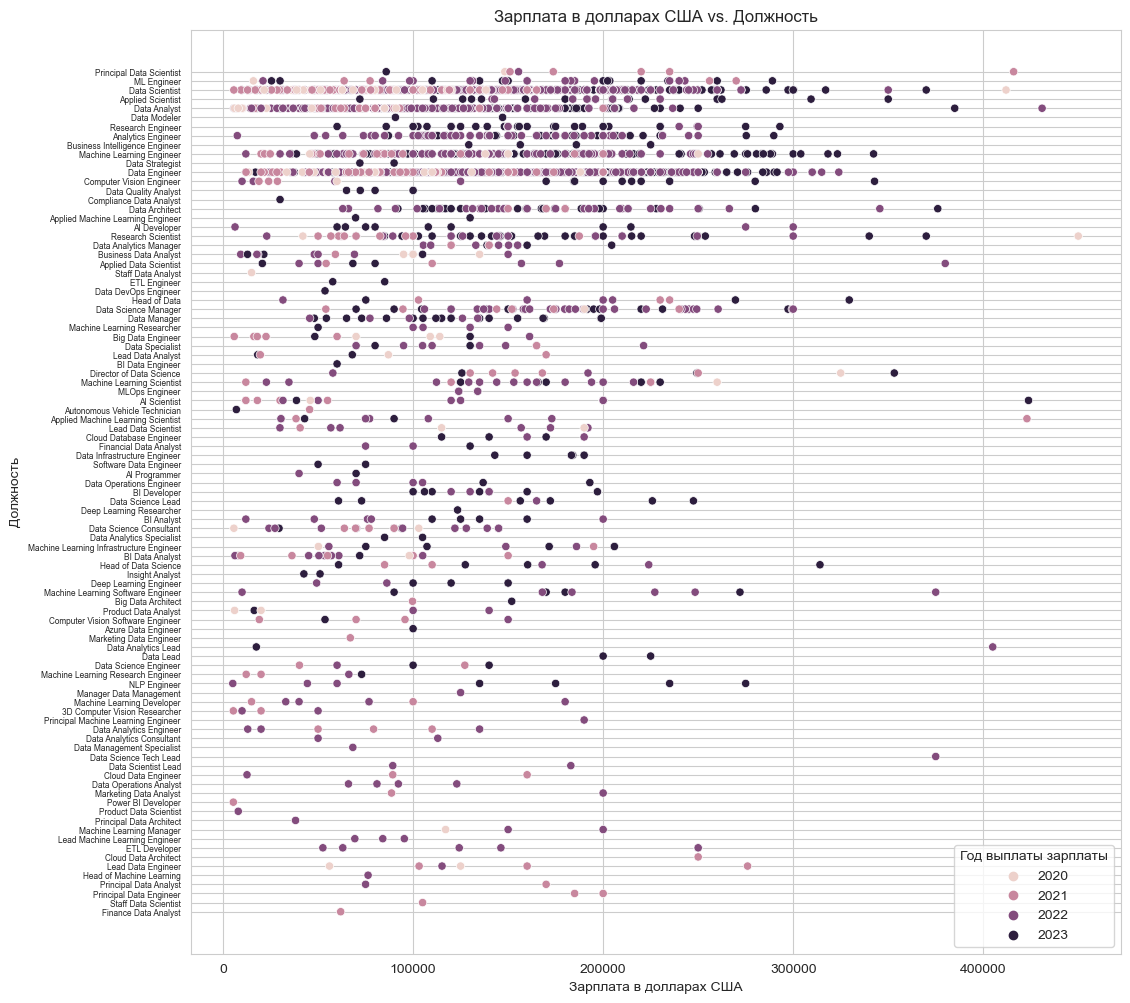

In [214]:
# Оценим связь Должности, на которой работал сотрудник в течение года и размер зарплаты в долларах США

plt.figure(figsize=(12, 12))
ax = sns.scatterplot(data=df_unique, x='salary_in_usd', y='job_title', hue='work_year')  
ax.set_xlabel('Зарплата в долларах США')  
ax.set_ylabel('Должность', fontsize=10)  # можем изменить размер шрифта оси Y
ax.set_title('Зарплата в долларах США vs. Должность')
plt.xticks(rotation=0)  # можем поменять расположение подписей по оси Х
plt.yticks(fontsize=6)  # можем поменять размер шрифта для должностей по оси Y
plt.legend(title='Год выплаты зарплаты')  
plt.show()

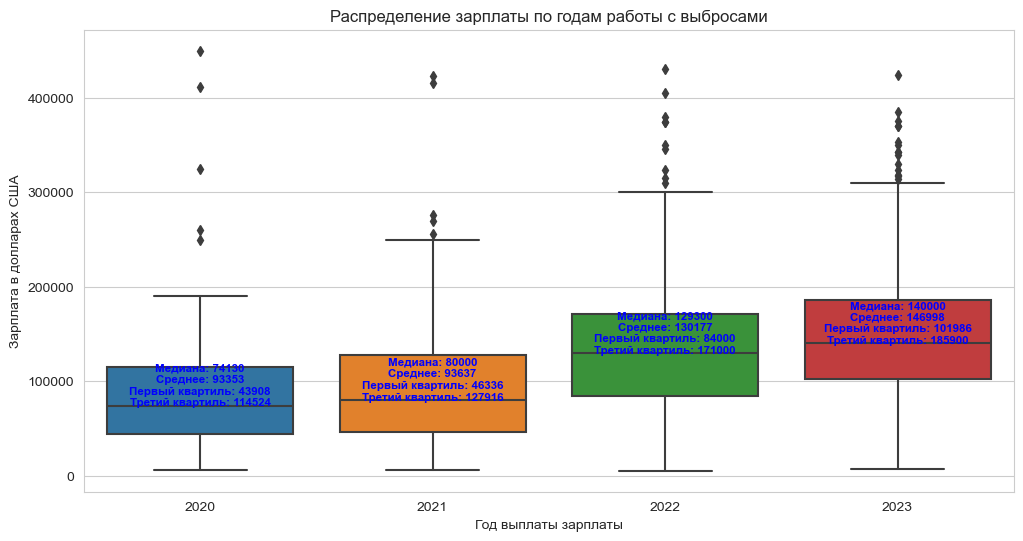

In [215]:
# Оценим выбросы по зарплате по годам, рассмотрим диаграмму размаха

plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df_unique, x='work_year', y='salary_in_usd')
ax.set_xlabel('Год выплаты зарплаты')
ax.set_ylabel('Зарплата в долларах США')
ax.set_title('Распределение зарплаты по годам работы с выбросами')

# Adding annotations for median, mean, first quartile, and third quartile
statistics = df_unique.groupby('work_year')['salary_in_usd'].describe()
for i, stats in enumerate(statistics.index):
    ax.text(i, statistics.loc[stats, '50%'], f'Медиана: {statistics.loc[stats, "50%"]:.0f}\nСреднее: {statistics.loc[stats, "mean"]:.0f}\nПервый квартиль: {statistics.loc[stats, "25%"]:.0f}\nТретий квартиль: {statistics.loc[stats, "75%"]:.0f}', 
            horizontalalignment='center', size='small', color='b', weight='semibold')

plt.show()

### a. Самые высокооплачиваемые должности, Топ-20 (на основе средней зарплаты)

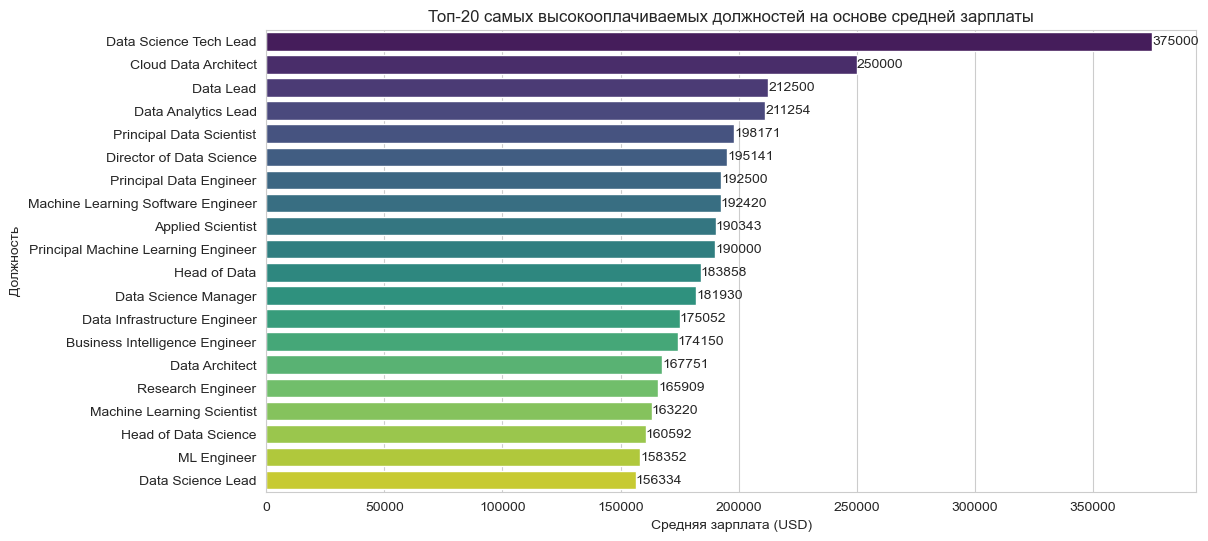

In [217]:
# Группируем данные по должности и находим среднюю зарплату
top_jobs = df_unique.groupby('job_title')['salary_in_usd'].mean().reset_index()

# Сортируем по убыванию зарплаты
top_jobs = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Выбираем топ-20 должностей
top_20_jobs = top_jobs.head(20)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='job_title', data=top_20_jobs, palette='viridis')
plt.title('Топ-20 самых высокооплачиваемых должностей на основе средней зарплаты')
plt.xlabel('Средняя зарплата (USD)')
plt.ylabel('Должность')

# Добавляем подписи к столбцам
for index, value in enumerate(top_20_jobs['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

In [218]:
top_20_jobs['salary_in_usd'] = top_20_jobs['salary_in_usd'].astype(int)
print(f'Топ 20 высокооплачиваемых должностей на основе средней зарплаты\n {top_20_jobs}')

Топ 20 высокооплачиваемых должностей на основе средней зарплаты
                               job_title  salary_in_usd
46               Data Science Tech Lead         375000
19                 Cloud Data Architect         250000
35                            Data Lead         212500
28                  Data Analytics Lead         211254
84             Principal Data Scientist         198171
53             Director of Data Science         195140
83              Principal Data Engineer         192500
75   Machine Learning Software Engineer         192420
8                     Applied Scientist         190342
85  Principal Machine Learning Engineer         190000
58                         Head of Data         183857
45                 Data Science Manager         181930
34         Data Infrastructure Engineer         175051
18       Business Intelligence Engineer         174150
31                       Data Architect         167751
88                    Research Engineer         165909


### a. Наличие выбросов по зарплате в разрезе должностей

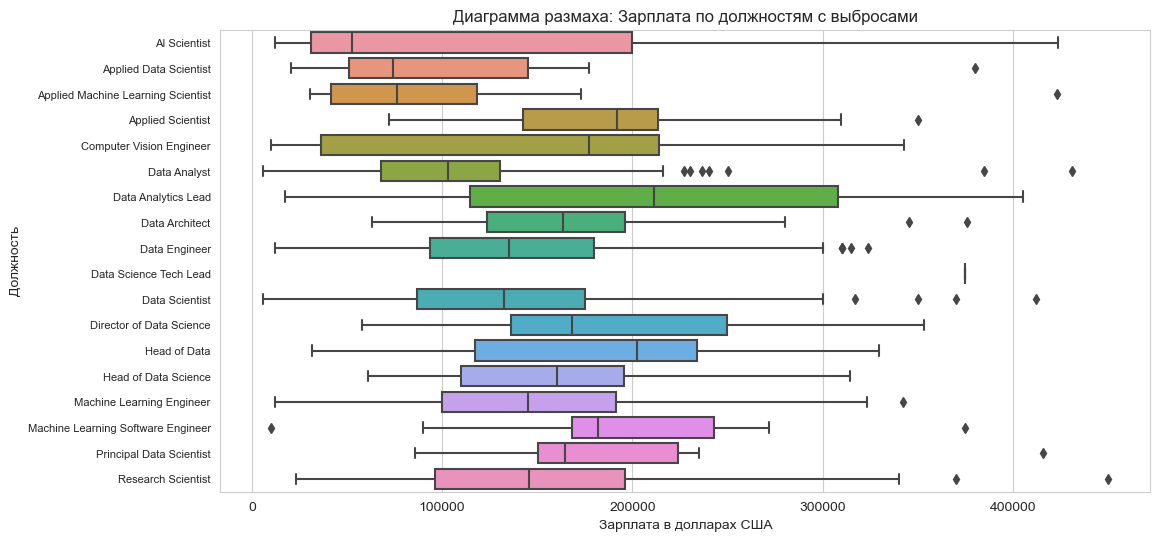

In [220]:
# Визуализируем должности с выбросами по зарплате
# Функция для определения выбросов
def find_outliers(data):
    Q1 = data['salary_in_usd'].quantile(0.25)
    Q3 = data['salary_in_usd'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data['salary_in_usd'] < lower_bound) | (data['salary_in_usd'] > upper_bound)]

# Находим выбросы по зарплате
outliers = find_outliers(df_unique)

# Определяем должности с выбросами
outlier_job_titles = outliers['job_title'].unique()

# Фильтруем исходный DataFrame для отображения только тех должностей, которые имеют выбросы
filtered_df = df_unique[df_unique['job_title'].isin(outlier_job_titles)].sort_values(by='job_title')

# Визуализация
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='salary_in_usd', y='job_title')
plt.xlabel('Зарплата в долларах США')
plt.ylabel('Должность')
plt.title('Диаграмма размаха: Зарплата по должностям с выбросами')
plt.xticks(rotation=0)  # Поворот подписей по оси X для лучшей читаемости
plt.yticks(fontsize=8)  # можем поменять размер шрифта для должностей по оси Y
plt.show()

### Статистика по выбросам по заработной плате

In [222]:
# Функция для определения выбросов
def find_outliers(data):
    Q1 = data['salary_in_usd'].quantile(0.25)
    Q3 = data['salary_in_usd'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data['salary_in_usd'] < lower_bound) | (data['salary_in_usd'] > upper_bound)]

# Находим выбросы по зарплате
outliers = find_outliers(df_unique)

# Определяем должности с выбросами
outlier_job_titles = outliers['job_title'].unique()

# Фильтруем исходный DataFrame для отображения только тех должностей, которые имеют выбросы
filtered_df = df_unique[df_unique['job_title'].isin(outlier_job_titles)]

# Получаем статистику по зарплате для должностей с выбросами
statistics = filtered_df.groupby('job_title')['salary_in_usd'].describe()

# Добавляем информацию о выбросах
outlier_counts = filtered_df['job_title'].value_counts()

# Объединяем статистику и количество выбросов в одну таблицу
statistics['outlier_count'] = outlier_counts

# Округляем до целого и сбрасываем индекс для удобства отображения
statistics = statistics.round().reset_index()

# Выводим таблицу с данными статистики и выбросами
print(statistics.to_string(index=False, header=True, line_width=140))

                         job_title  count     mean      std      min      25%      50%      75%      max  outlier_count
                      AI Scientist   16.0 110121.0 111734.0  12000.0  31140.0  52500.0 200000.0 423834.0             16
            Applied Data Scientist   10.0 113726.0 106294.0  20670.0  51060.0  74159.0 145259.0 380000.0             10
Applied Machine Learning Scientist   12.0 109453.0 108602.0  30469.0  41792.0  76060.0 118500.0 423000.0             12
                 Applied Scientist   31.0 190343.0  57156.0  72000.0 142400.0 192000.0 213230.0 350000.0             31
          Computer Vision Engineer   18.0 143536.0 103188.0  10000.0  36166.0 177295.0 213750.0 342810.0             18
                      Data Analyst  396.0 105324.0  51874.0   5723.0  68050.0 102920.0 130288.0 430967.0            396
               Data Analytics Lead    2.0 211254.0 273998.0  17509.0 114382.0 211254.0 308127.0 405000.0              2
                    Data Architect   64.

## a. Рассмотрим диаграмму размаха по всем должностям, оценим выбросы по зарплате в разрезе должностей

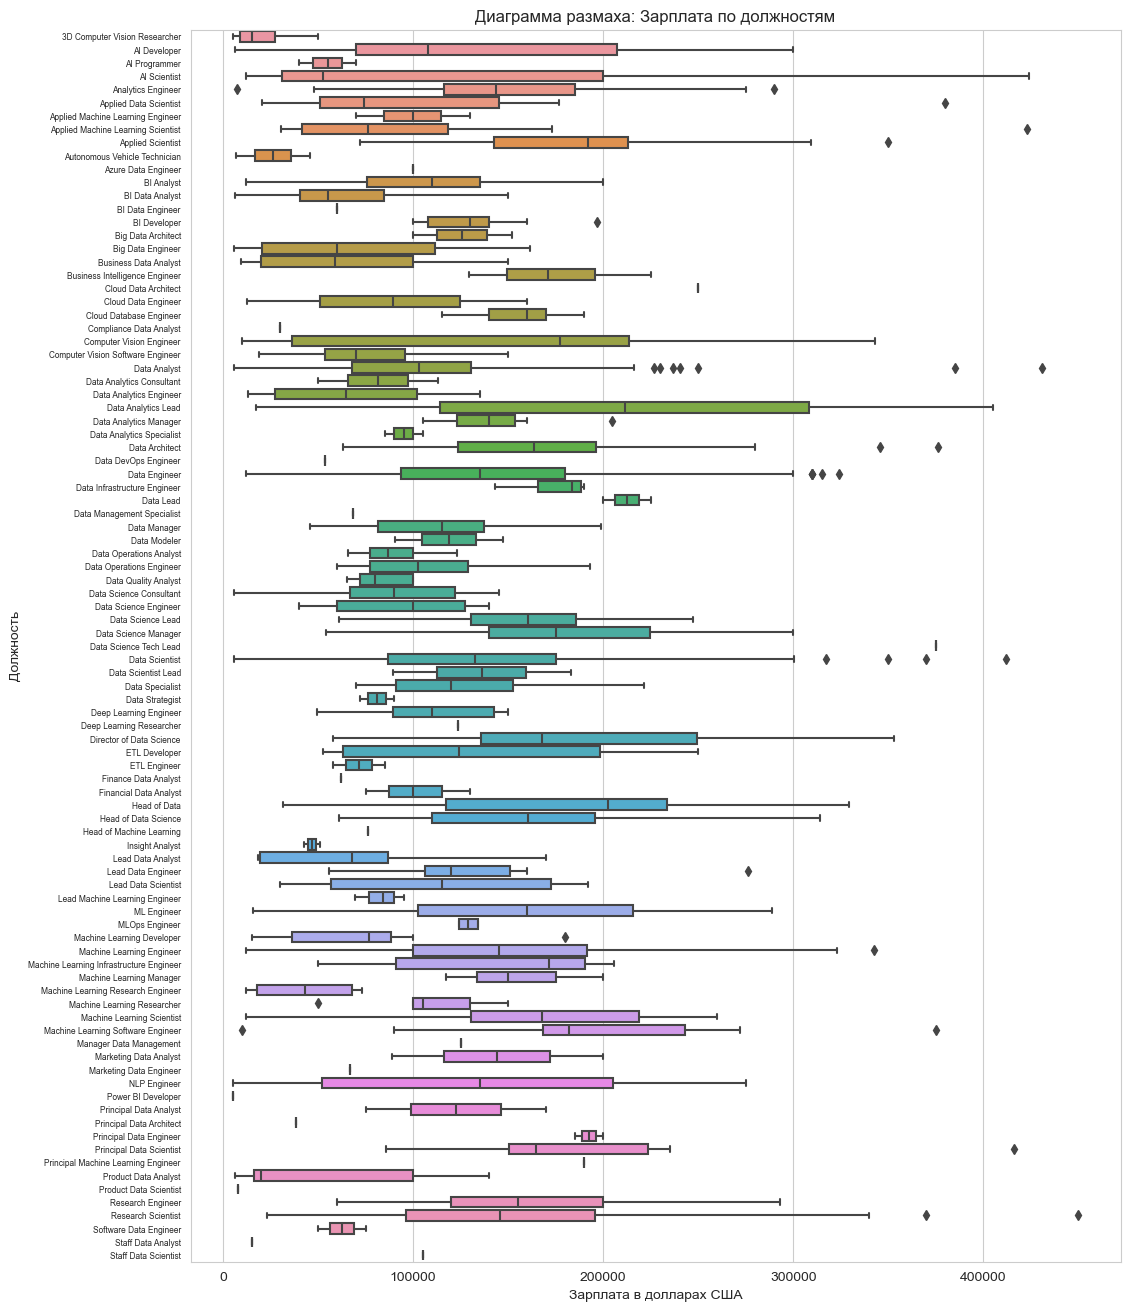

In [224]:
# Оценим выбросы по зарплате в разрезе должностей, рассмотрим диаграмму размаха
# Сортируем данные по зарплате
df_unique_sorted = df_unique.sort_values(by='job_title')

# визуализируем
plt.figure(figsize=(12, 16))
sns.boxplot(data=df_unique_sorted, x='salary_in_usd', y='job_title')
plt.xlabel('Зарплата в долларах США')
plt.ylabel('Должность')
plt.title('Диаграмма размаха: Зарплата по должностям')
plt.xticks(rotation=0)  # Поворот подписей по оси X для лучшей читаемости
plt.yticks(fontsize=6)  # можем поменять размер шрифта для должностей по оси Y
plt.show()

### b. Зависимость зарплаты от формата работы (офис / удаленная работа)

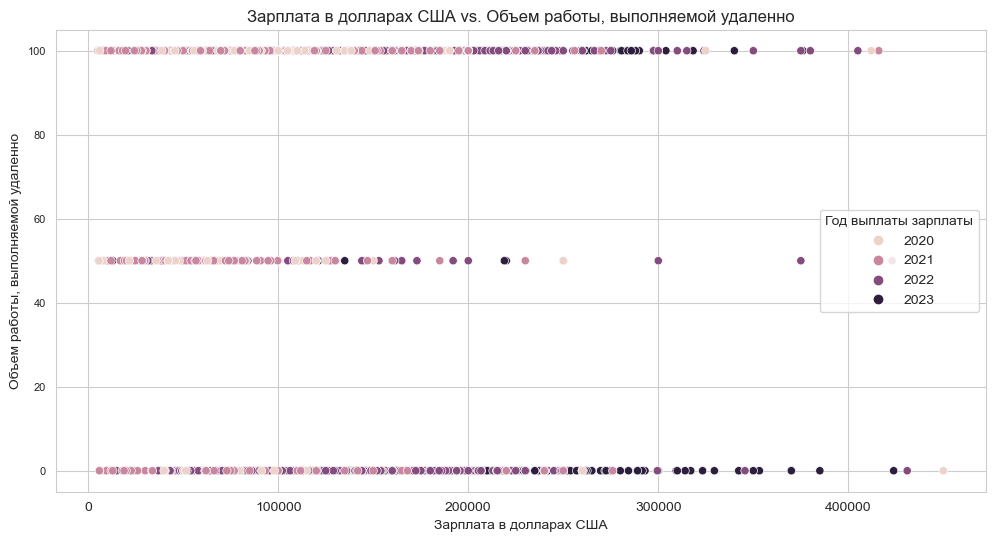

In [226]:
# Оценим связь формата работы и размер зарплаты в долларах США

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=df_unique, x='salary_in_usd', y='remote_ratio', hue='work_year')  
ax.set_xlabel('Зарплата в долларах США')  
ax.set_ylabel('Объем работы, выполняемой удаленно', fontsize=10)  # можем изменить размер шрифта оси Y
ax.set_title('Зарплата в долларах США vs. Объем работы, выполняемой удаленно')
plt.xticks(rotation=0)  # можем поменять расположение подписей по оси Х
plt.yticks(fontsize=8)  # можем поменять размер шрифта для должностей по оси Y
plt.legend(title='Год выплаты зарплаты')  
plt.show()

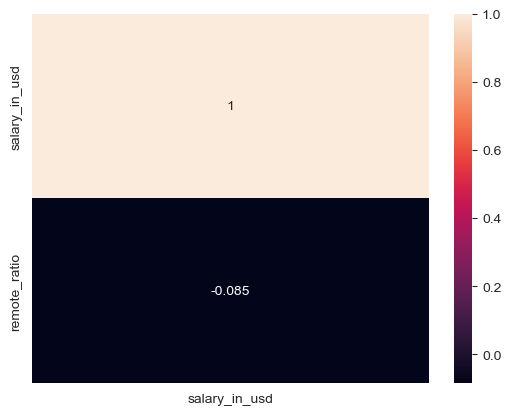

In [227]:
# Оценим связь формата работы и размер зарплаты в долларах США, корреляцию между ними
sns.heatmap(df_unique[['salary_in_usd', 'remote_ratio']].corr()[['salary_in_usd']], annot=True);

### b. Вывод: Корреляция между форматом работы и зарплатой в долларах США отсутствует (-0,09)


### b. Зависимость средней зарплаты от формата работы (офис/удаленная работа) / продолжение

In [230]:
# Группируем данные по формату работы и находим среднюю зарплату
top_remote_ratio = df_unique.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()

# Округляем среднюю зарплату до целого числа
top_remote_ratio['salary_in_usd'] = top_remote_ratio['salary_in_usd'].round()

# Сортируем по убыванию зарплаты
top_remote_ratio = top_remote_ratio.sort_values(by='salary_in_usd', ascending=False)
print(f'Формат работы (удаленка/офис) и зарплата в долларах США:\nind {top_remote_ratio}')

Формат работы (удаленка/офис) и зарплата в долларах США:
ind    remote_ratio  salary_in_usd
0             0       143690.0
2           100       131822.0
1            50        78487.0


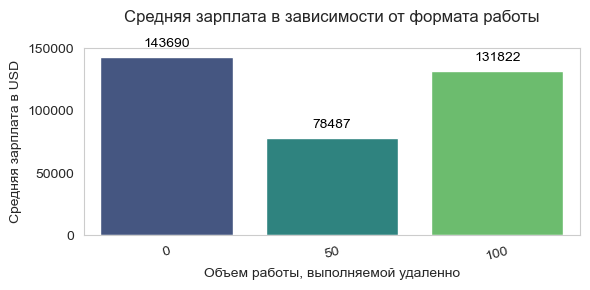

In [231]:
# Визуализация
plt.figure(figsize=(6, 3))
barplot = sns.barplot(data=top_remote_ratio, x='remote_ratio', y='salary_in_usd', palette='viridis')

# Добавляем надписи для величины значения
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.title('Средняя зарплата в зависимости от формата работы\n')
plt.xlabel('Объем работы, выполняемой удаленно')
plt.ylabel('Средняя зарплата в USD')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### b. Вывод: Наибольшая средняя зарплата в офисе, наименьшая при смешанном типе, средняя между ними на чистой удаленке

### c. Зависимость зарплаты от размера предприятия

In [234]:
# Группируем данные по формату работы и находим среднюю зарплату
top_remote_ratio = df_unique.groupby('company_size')['salary_in_usd'].mean().reset_index()

# Округляем среднюю зарплату до целого числа
top_remote_ratio['salary_in_usd'] = top_remote_ratio['salary_in_usd'].round()

# Сортируем по убыванию зарплаты
top_remote_ratio = top_remote_ratio.sort_values(by='salary_in_usd', ascending=False)
print(f'Размер предприятия и зарплата в долларах США:\nind {top_remote_ratio}')

Размер предприятия и зарплата в долларах США:
ind   company_size  salary_in_usd
1            M       141475.0
0            L       113202.0
2            S        78364.0


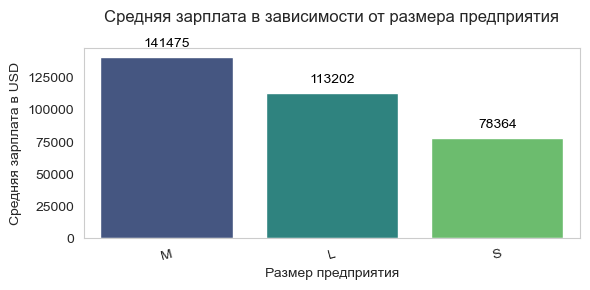

In [235]:
# Визуализация
plt.figure(figsize=(6, 3))
barplot = sns.barplot(data=top_remote_ratio, x='company_size', y='salary_in_usd', palette='viridis')

# Добавляем надписи для величины значения
for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 5), 
                     textcoords='offset points')

plt.title('Средняя зарплата в зависимости от размера предприятия\n')
plt.xlabel('Размер предприятия')
plt.ylabel('Средняя зарплата в USD')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

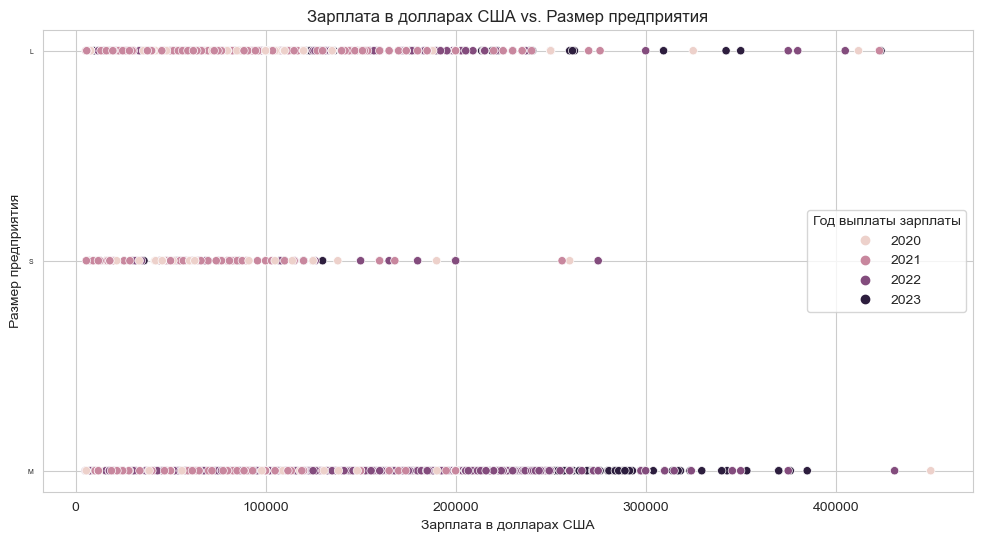

In [236]:
# Оценим связь между размером предприятия и размером зарплаты в долларах США

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=df_unique, x='salary_in_usd', y='company_size', hue='work_year')  
ax.set_xlabel('Зарплата в долларах США')  
ax.set_ylabel('Размер предприятия', fontsize=10)  # можем изменить размер шрифта оси Y
ax.set_title('Зарплата в долларах США vs. Размер предприятия')
plt.xticks(rotation=0)  # можем поменять расположение подписей по оси Х
plt.yticks(fontsize=5)  # можем поменять размер шрифта для должностей по оси Y
plt.legend(title='Год выплаты зарплаты')  
plt.show()

Наибольшая средняя зарплата в средних компаниях, наименьшая в малых, большие компании выплачивают среднюю зарплату (вероятно средняя усредняется, за счет размера компании).

### d. Наиболее популярные страны среди вакансий

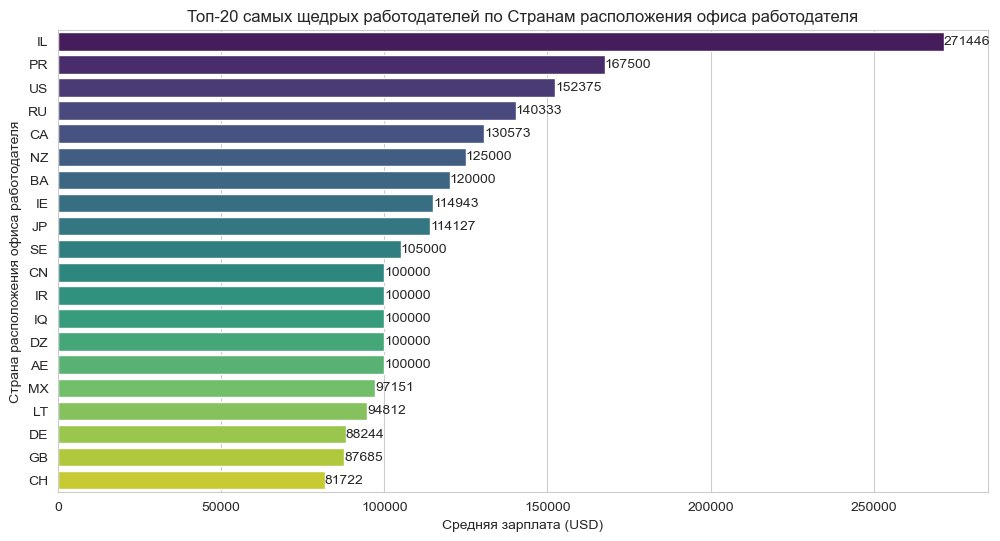

In [239]:
# Группируем данные по стране расположения офиса и находим среднюю зарплату
top_jobs = df_unique.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Сортируем по убыванию зарплаты
top_jobs = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Выбираем топ-20 стран расположения офиса
top_20_jobs = top_jobs.head(20)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x='salary_in_usd', y='company_location', data=top_20_jobs, palette='viridis')
plt.title('Топ-20 самых щедрых работодателей по Странам расположения офиса работодателя')
plt.xlabel('Средняя зарплата (USD)')
plt.ylabel('Страна расположения офиса работодателя')

# Добавляем подписи к столбцам
for index, value in enumerate(top_20_jobs['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

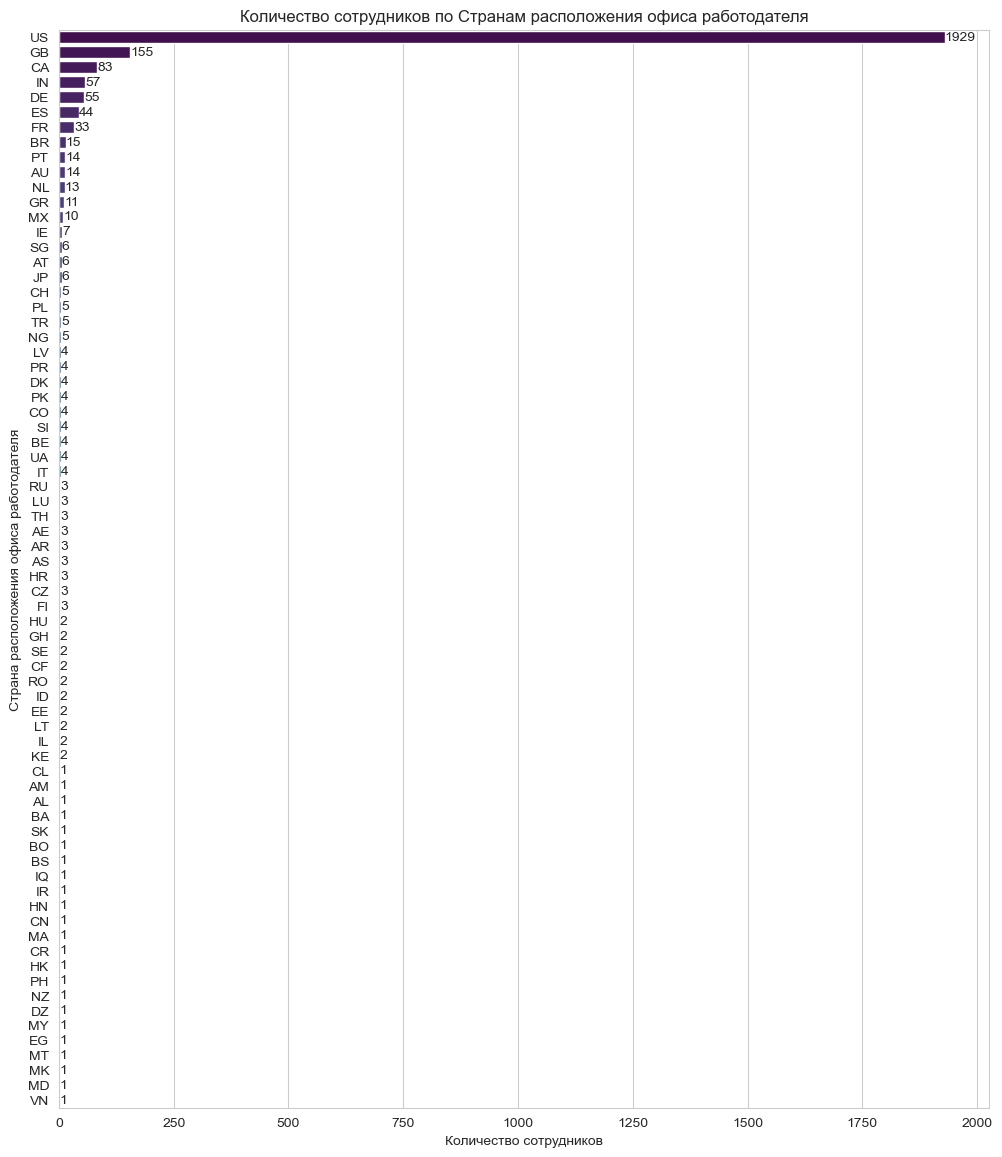

In [240]:
# Группируем данные по стране расположения офиса и находим количество сотрудников
top_jobs = df_unique.groupby('company_location')['salary_in_usd'].count().reset_index()

# Сортируем по убыванию сотрудников
top_jobs = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Визуализация
plt.figure(figsize=(12, 14))
sns.barplot(x='salary_in_usd', y='company_location', data=top_jobs, palette='viridis')
plt.title('Количество сотрудников по Странам расположения офиса работодателя')
plt.xlabel('Количество сотрудников')
plt.ylabel('Страна расположения офиса работодателя')

# Добавляем подписи к столбцам
for index, value in enumerate(top_jobs['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

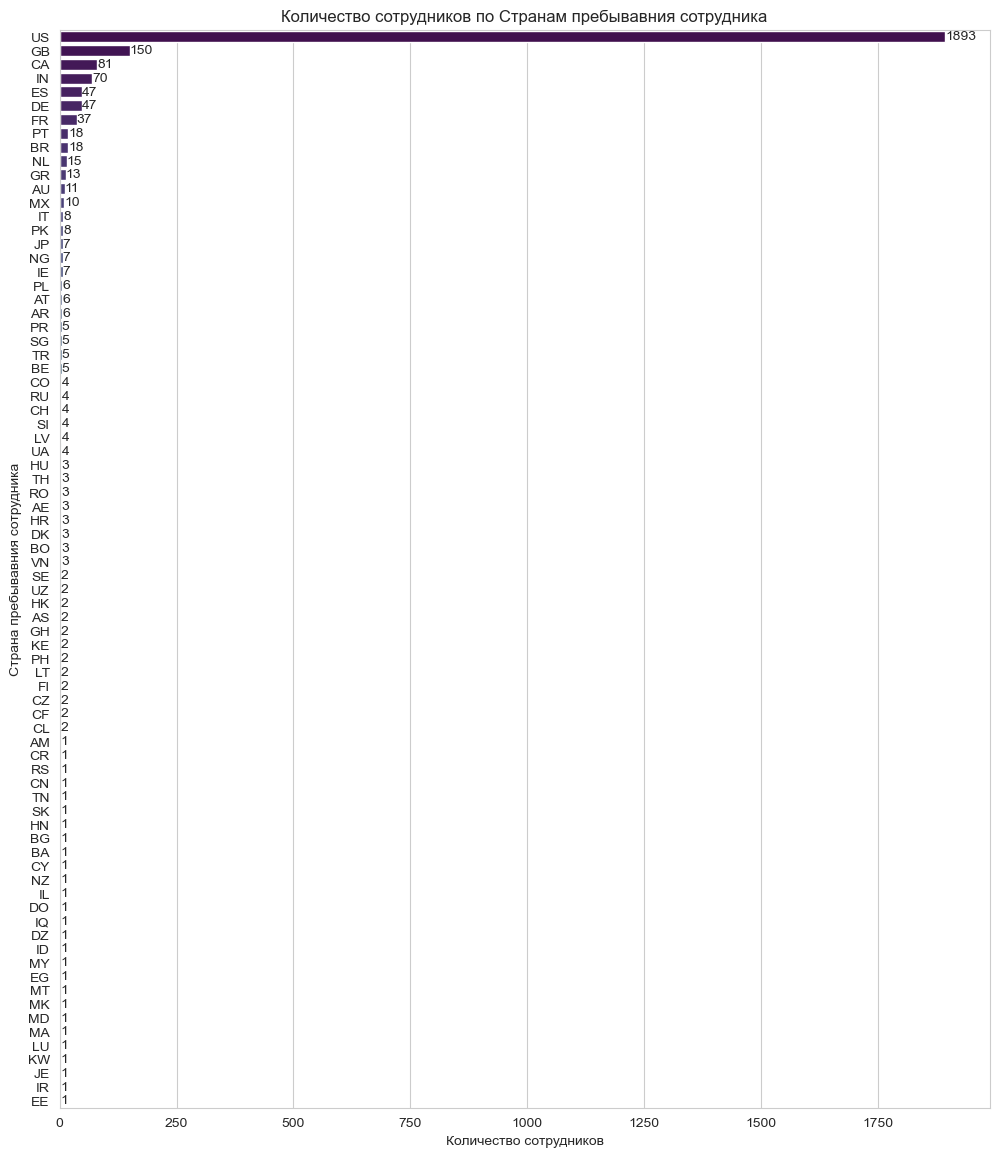

In [241]:
# Группируем данные по стране пребывавния сотрудника и находим количество сотрудников
top_jobs = df_unique.groupby('employee_residence')['salary_in_usd'].count().reset_index()

# Сортируем по убыванию сотрудников
top_jobs = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Визуализация
plt.figure(figsize=(12, 14))
sns.barplot(x='salary_in_usd', y='employee_residence', data=top_jobs, palette='viridis')
plt.title('Количество сотрудников по Странам пребывавния сотрудника')
plt.xlabel('Количество сотрудников')
plt.ylabel('Страна пребывавния сотрудника')

# Добавляем подписи к столбцам
for index, value in enumerate(top_jobs['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

## d. Распределение заработной платы в зависимости от страны офиса

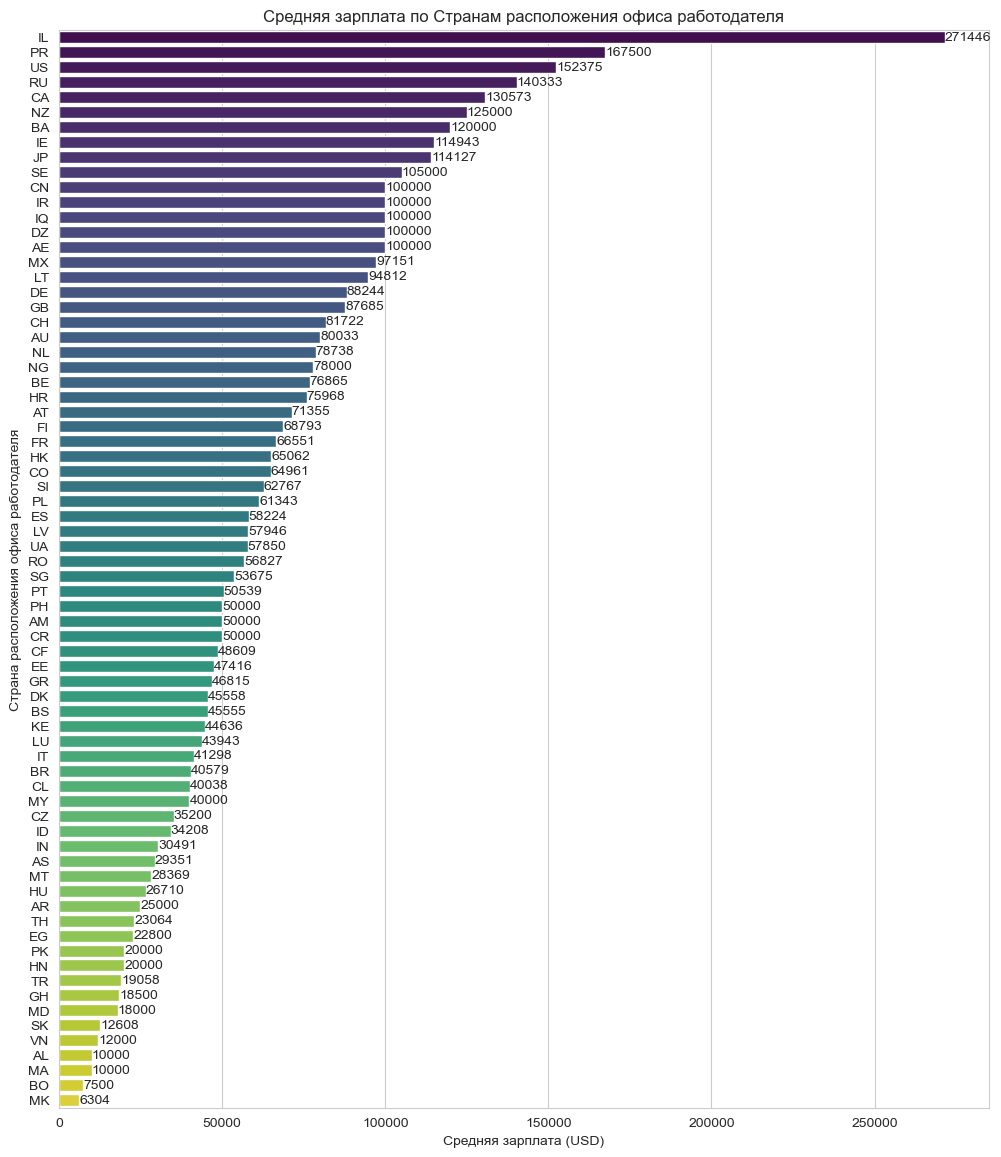

In [243]:
# Группируем данные по стране расположения офиса и находим среднюю зарплату
top_jobs = df_unique.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Сортируем по убыванию зарплаты
top_jobs = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Визуализация
plt.figure(figsize=(12, 14))
sns.barplot(x='salary_in_usd', y='company_location', data=top_jobs, palette='viridis')
plt.title('Средняя зарплата по Странам расположения офиса работодателя')
plt.xlabel('Средняя зарплата (USD)')
plt.ylabel('Страна расположения офиса работодателя')

# Добавляем подписи к столбцам
for index, value in enumerate(top_jobs['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

### d.  Статистика распределение заработной платы по странам расположения офиса

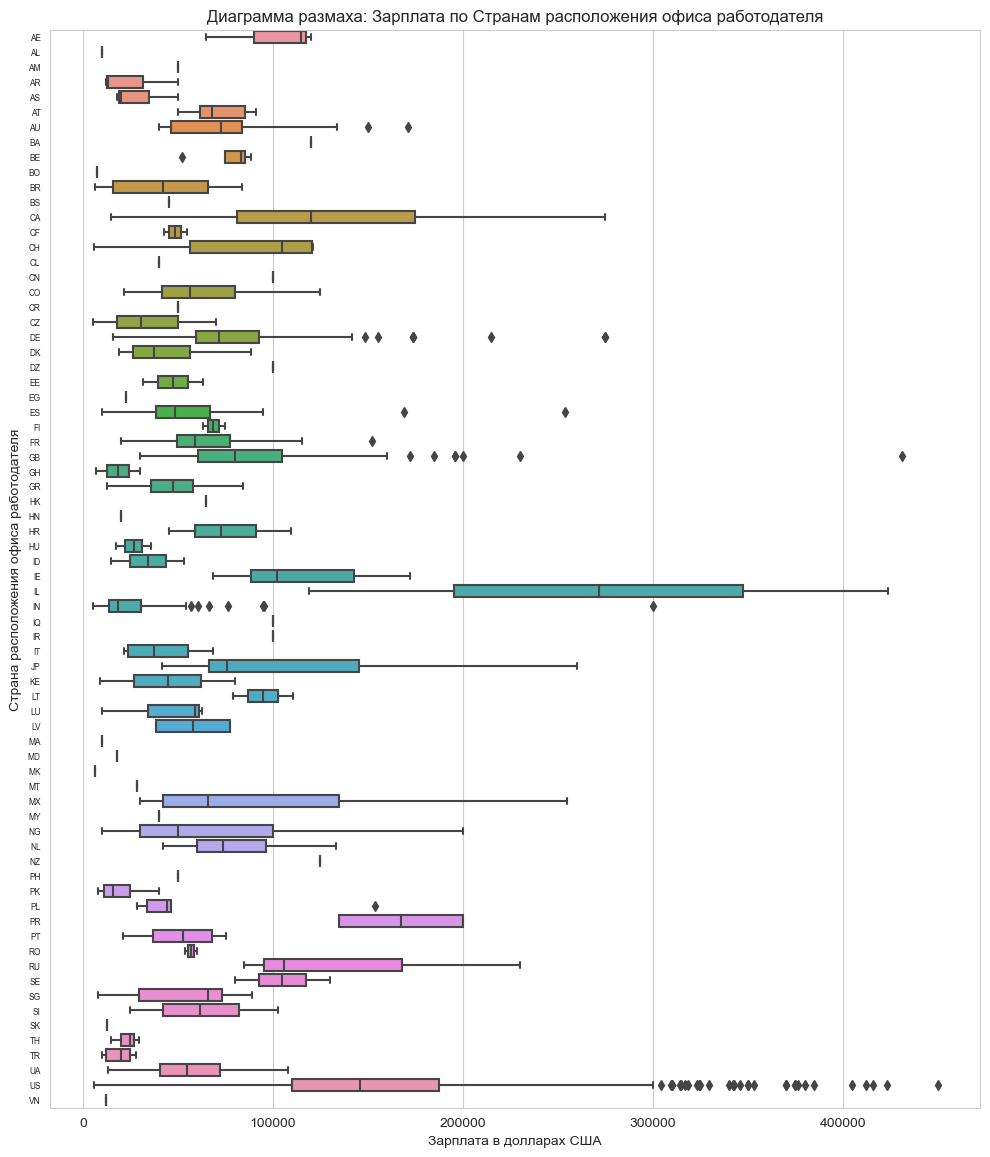

In [245]:
# Оценим выбросы по зарплате в разрезе страны расположения офиса работодателя, рассмотрим диаграмму размаха
# Сортируем данные по зарплате
df_unique_sorted = df_unique.sort_values(by='company_location')

# визуализируем
plt.figure(figsize=(12, 14))
sns.boxplot(data=df_unique_sorted, x='salary_in_usd', y='company_location')
plt.xlabel('Зарплата в долларах США')
plt.ylabel('Страна расположения офиса работодателя')
plt.title('Диаграмма размаха: Зарплата по Странам расположения офиса работодателя')
plt.xticks(rotation=0)  # Поворот подписей по оси X для лучшей читаемости
plt.yticks(fontsize=6)  # можем поменять размер шрифта для должностей по оси Y
plt.show()

### d.  Статистика распределения заработной платы по странам пребывания сотрудников

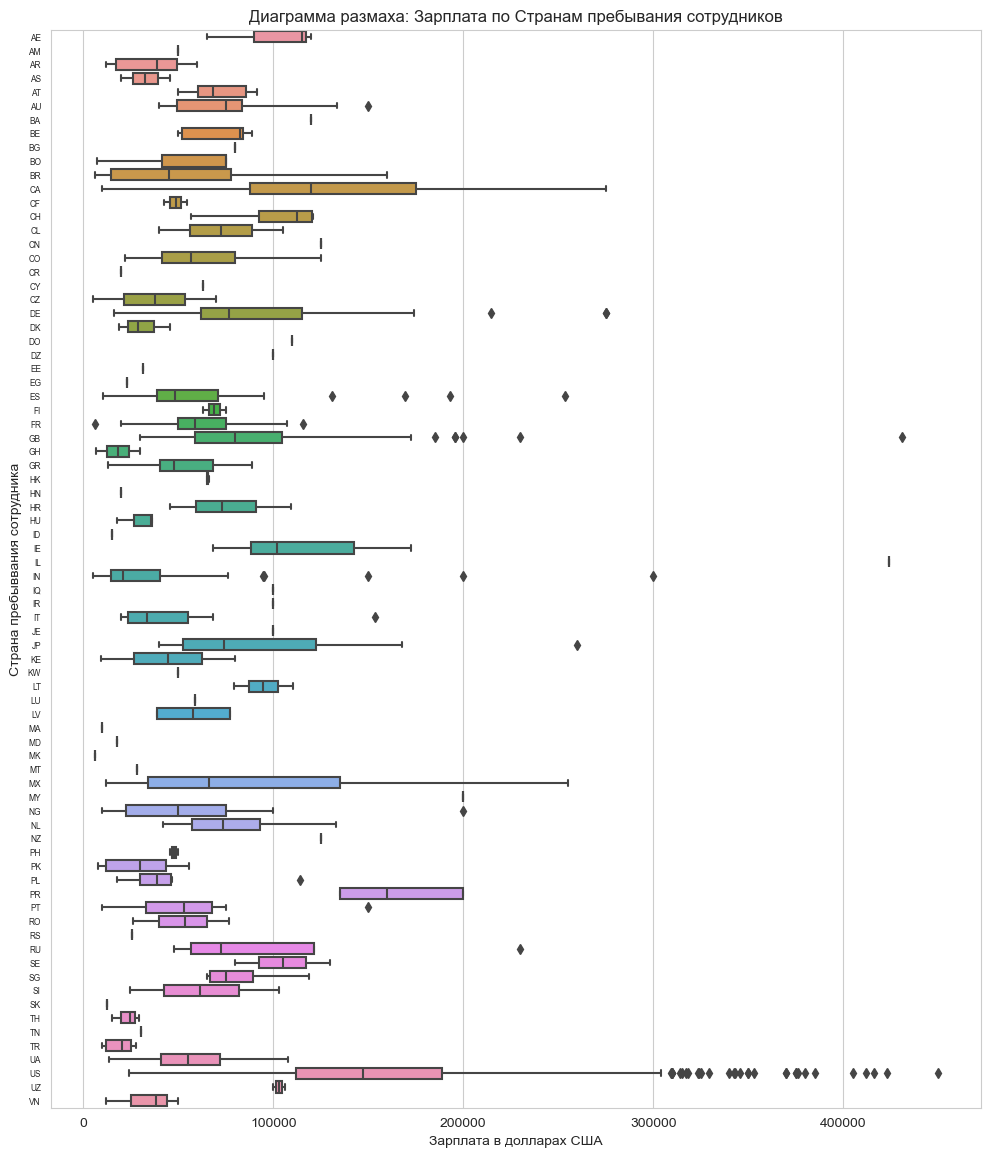

In [247]:
# Оценим выбросы по зарплате в разрезе страны пребывания сотрудника, рассмотрим диаграмму размаха
# Сортируем данные по зарплате
df_unique_sorted = df_unique.sort_values(by='employee_residence')

# визуализируем
plt.figure(figsize=(12, 14))
sns.boxplot(data=df_unique_sorted, x='salary_in_usd', y='employee_residence')
plt.xlabel('Зарплата в долларах США')
plt.ylabel('Страна пребыввания сотрудника')
plt.title('Диаграмма размаха: Зарплата по Странам пребывания сотрудников')
plt.xticks(rotation=0)  # Поворот подписей по оси X для лучшей читаемости
plt.yticks(fontsize=6)  # можем поменять размер шрифта для должностей по оси Y
plt.show()

### e. Оценка медианной заработной платы по каждой должности

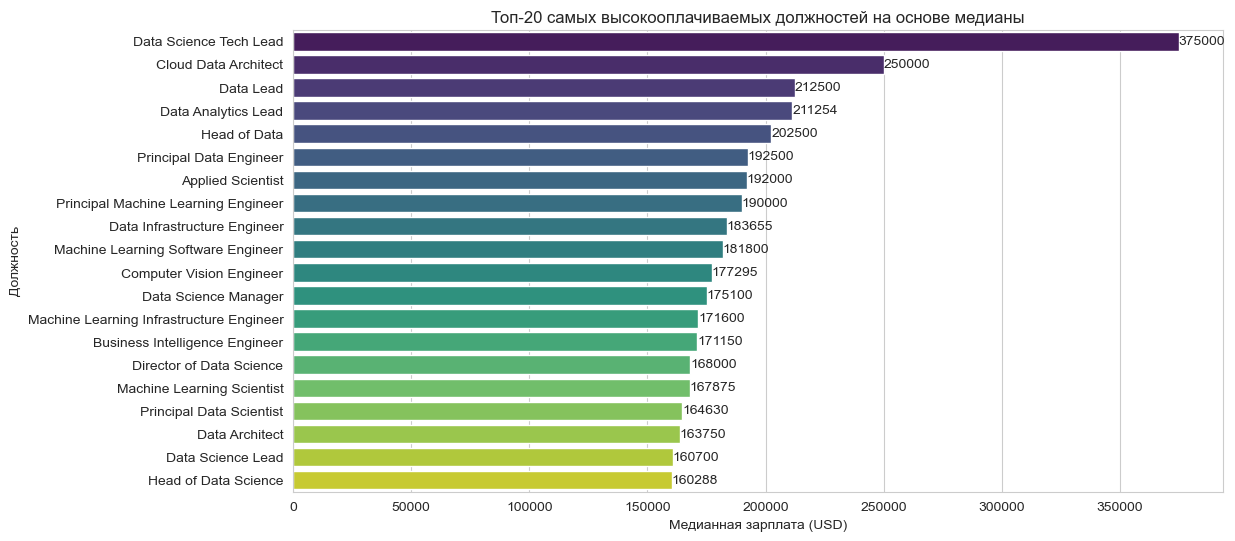

In [249]:
# Группируем данные по должности и находим медианную зарплату
top_jobs = df_unique.groupby('job_title')['salary_in_usd'].median().reset_index()

# Сортируем по убыванию зарплаты
top_jobs_md = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Выбираем топ-20 должностей
top_20_jobs_md = top_jobs_md.head(20)

# Визуализация
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='salary_in_usd', y='job_title', data=top_20_jobs_md, palette='viridis')
plt.title('Топ-20 самых высокооплачиваемых должностей на основе медианы')
plt.xlabel('Медианная зарплата (USD)')
plt.ylabel('Должность')

# Добавляем подписи к столбцам
for index, value in enumerate(top_20_jobs_md['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

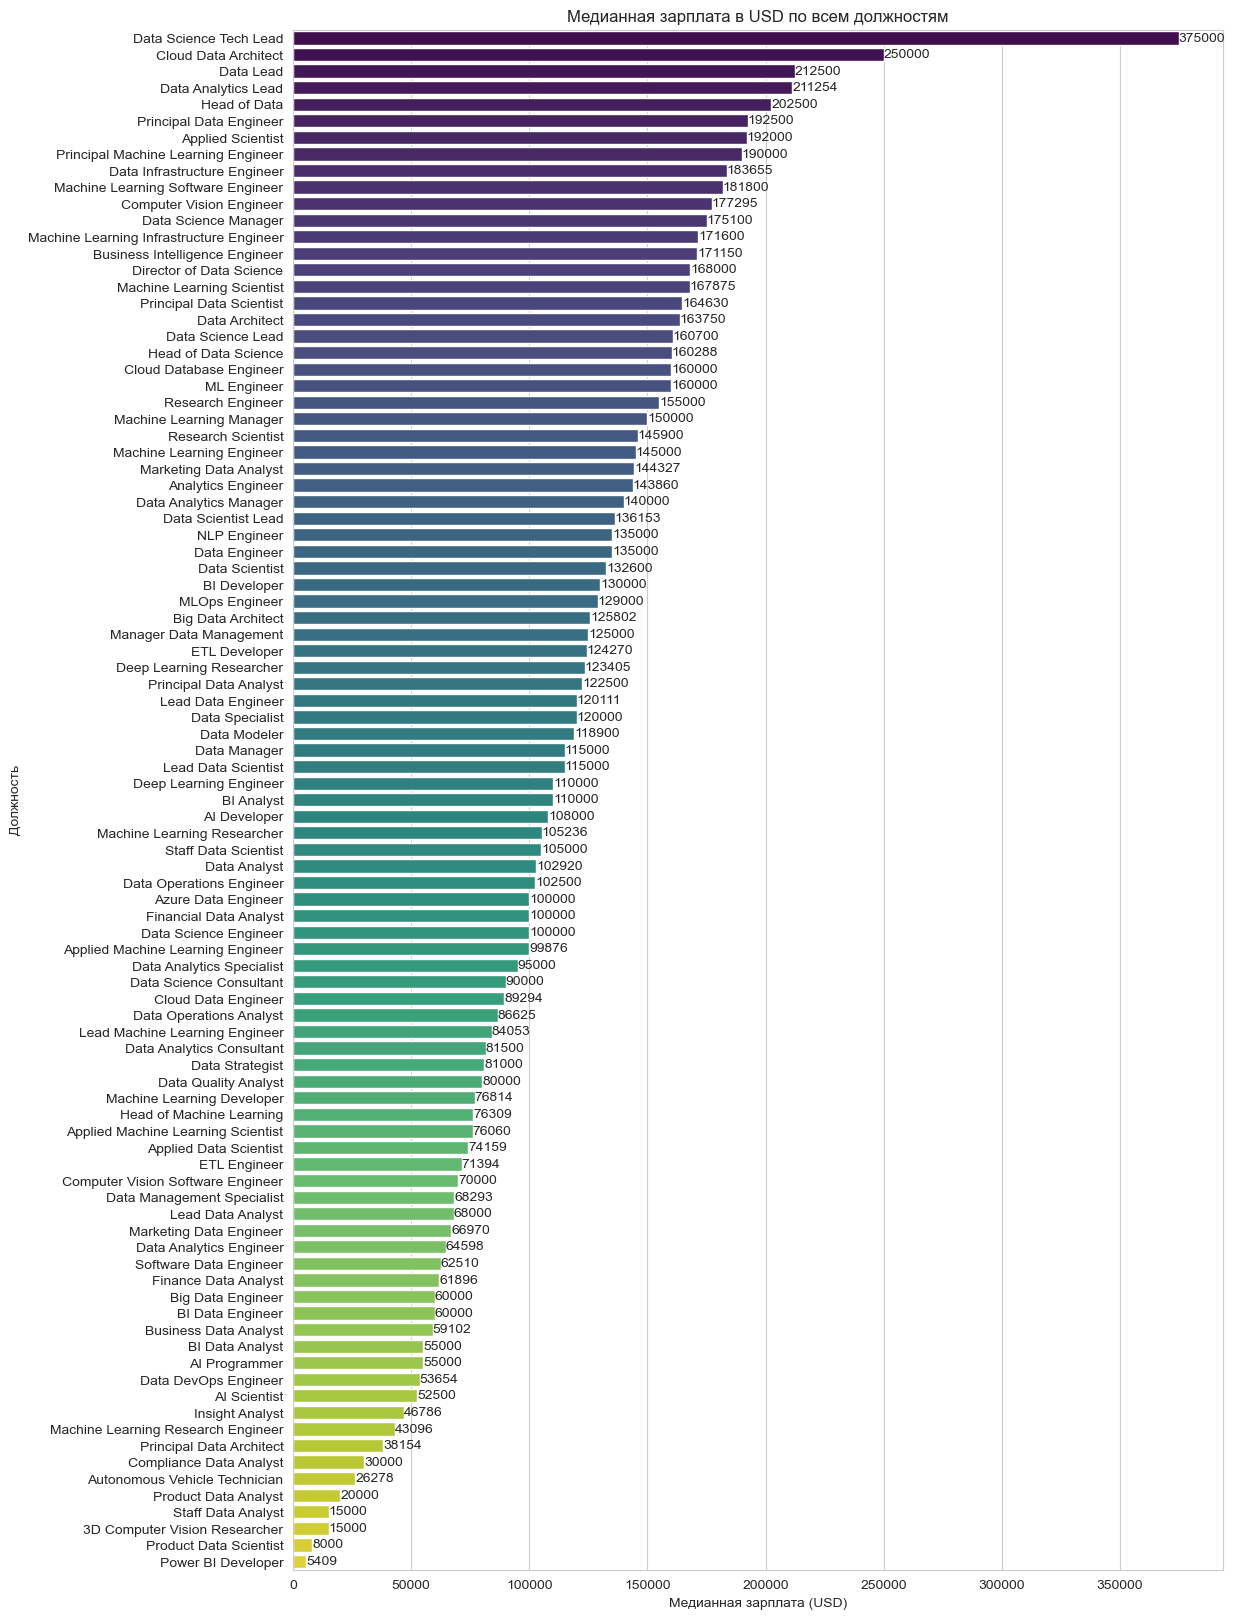

In [250]:
# Визуализация
plt.figure(figsize=(12, 20))
barplot = sns.barplot(x='salary_in_usd', y='job_title', data=top_jobs_md, palette='viridis')
plt.title('Медианная зарплата в USD по всем должностям')
plt.xlabel('Медианная зарплата (USD)')
plt.ylabel('Должность')

# Добавляем подписи к столбцам
for index, value in enumerate(top_jobs_md['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

### f. Изменение зарплат в 2023 году относительно 2020 года 

#### Визуализация средней зарплаты только по тем должностям, которые были в 2020 году и остались в 2023 году

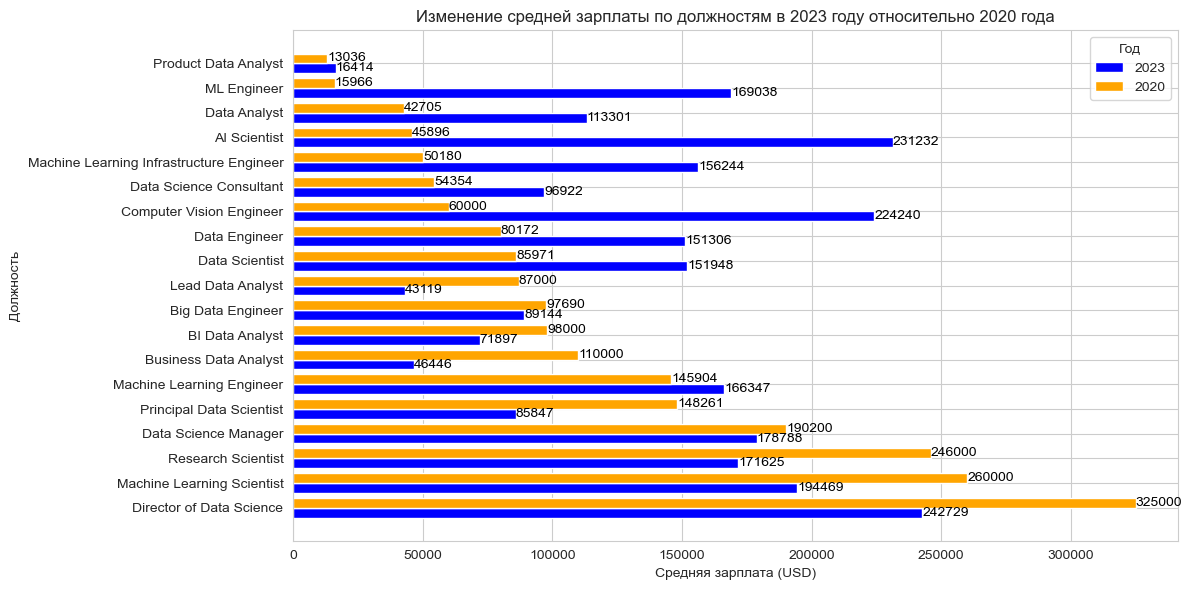

In [253]:
# Фильтруем данные только для 2020 и 2023 годов
filtered_df = df_unique[df_unique['work_year'].isin([2020, 2023])]

# Группируем данные по должности и году, находим среднюю зарплату
mean_salary = filtered_df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()

# Пивотируем данные для удобного отображения
pivot_salary = mean_salary.pivot(index='job_title', columns='work_year', values='salary_in_usd').reset_index()

# Отбираем только те должности, которые есть в обоих годах
pivot_salary = pivot_salary.dropna()

# Сортируем по средней зарплате 2020 года
pivot_salary = pivot_salary.sort_values(by=2020, ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))

# Создаем индексы для каждой должности
indices = range(len(pivot_salary))

# Высота столбцов для визуализации
bar_width = 0.4

# Столбцы для 2023 года
plt.barh(indices, pivot_salary[2023], label='2023', color='blue', height=bar_width)

# Столбцы для 2020 года, сдвинутые на высоту столбца
plt.barh([i + bar_width for i in indices], pivot_salary[2020], label='2020', color='orange', height=bar_width)

# Настройка графика
plt.title('Изменение средней зарплаты по должностям в 2023 году относительно 2020 года')
plt.xlabel('Средняя зарплата (USD)')
plt.ylabel('Должность')
plt.yticks([i + bar_width / 2 for i in indices], pivot_salary['job_title'])
plt.legend(title='Год')

# Добавляем подписи к столбцам
for index, (value_2023, value_2020) in enumerate(zip(pivot_salary[2023], pivot_salary[2020])):
    plt.text(value_2023, index, f'{value_2023:.0f}', va='center', ha='left', color='black', fontsize=10)
    plt.text(value_2020, index + bar_width, f'{value_2020:.0f}', va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()  # Для улучшенного оформления
plt.show()

#### f. Прирост в % отностительно 2020 года средней зарплаты только по тем должностям, которые были в 2020 году и остались в 2023 году

In [255]:
# Рассчитываем прирост в % относительно 2020 года
pivot_salary['Growth (%)'] = ((pivot_salary[2023] - pivot_salary[2020]) / pivot_salary[2020]) * 100

# Преобразуем прирост в целое число
pivot_salary[2020] = pivot_salary[2020].astype(int)
pivot_salary[2023] = pivot_salary[2023].astype(int)
pivot_salary['Growth (%)'] = pivot_salary['Growth (%)'].astype(int)

# Выводим таблицу с приростом
print(pivot_salary[['job_title', 2020, 2023, 'Growth (%)']].to_string(index=False, header=True, line_width=100))

                               job_title   2020   2023  Growth (%)
                Director of Data Science 325000 242728         -25
              Machine Learning Scientist 260000 194468         -25
                      Research Scientist 246000 171624         -30
                    Data Science Manager 190200 178787          -6
                Principal Data Scientist 148261  85847         -42
               Machine Learning Engineer 145904 166346          14
                   Business Data Analyst 110000  46446         -57
                         BI Data Analyst  98000  71897         -26
                       Big Data Engineer  97690  89144          -8
                       Lead Data Analyst  87000  43119         -50
                          Data Scientist  85970 151947          76
                           Data Engineer  80172 151305          88
                Computer Vision Engineer  60000 224240         273
                 Data Science Consultant  54353  96921        

#### Визуализация средней зарплаты по должностям, которые были в 2020 году и появились в 2023 году

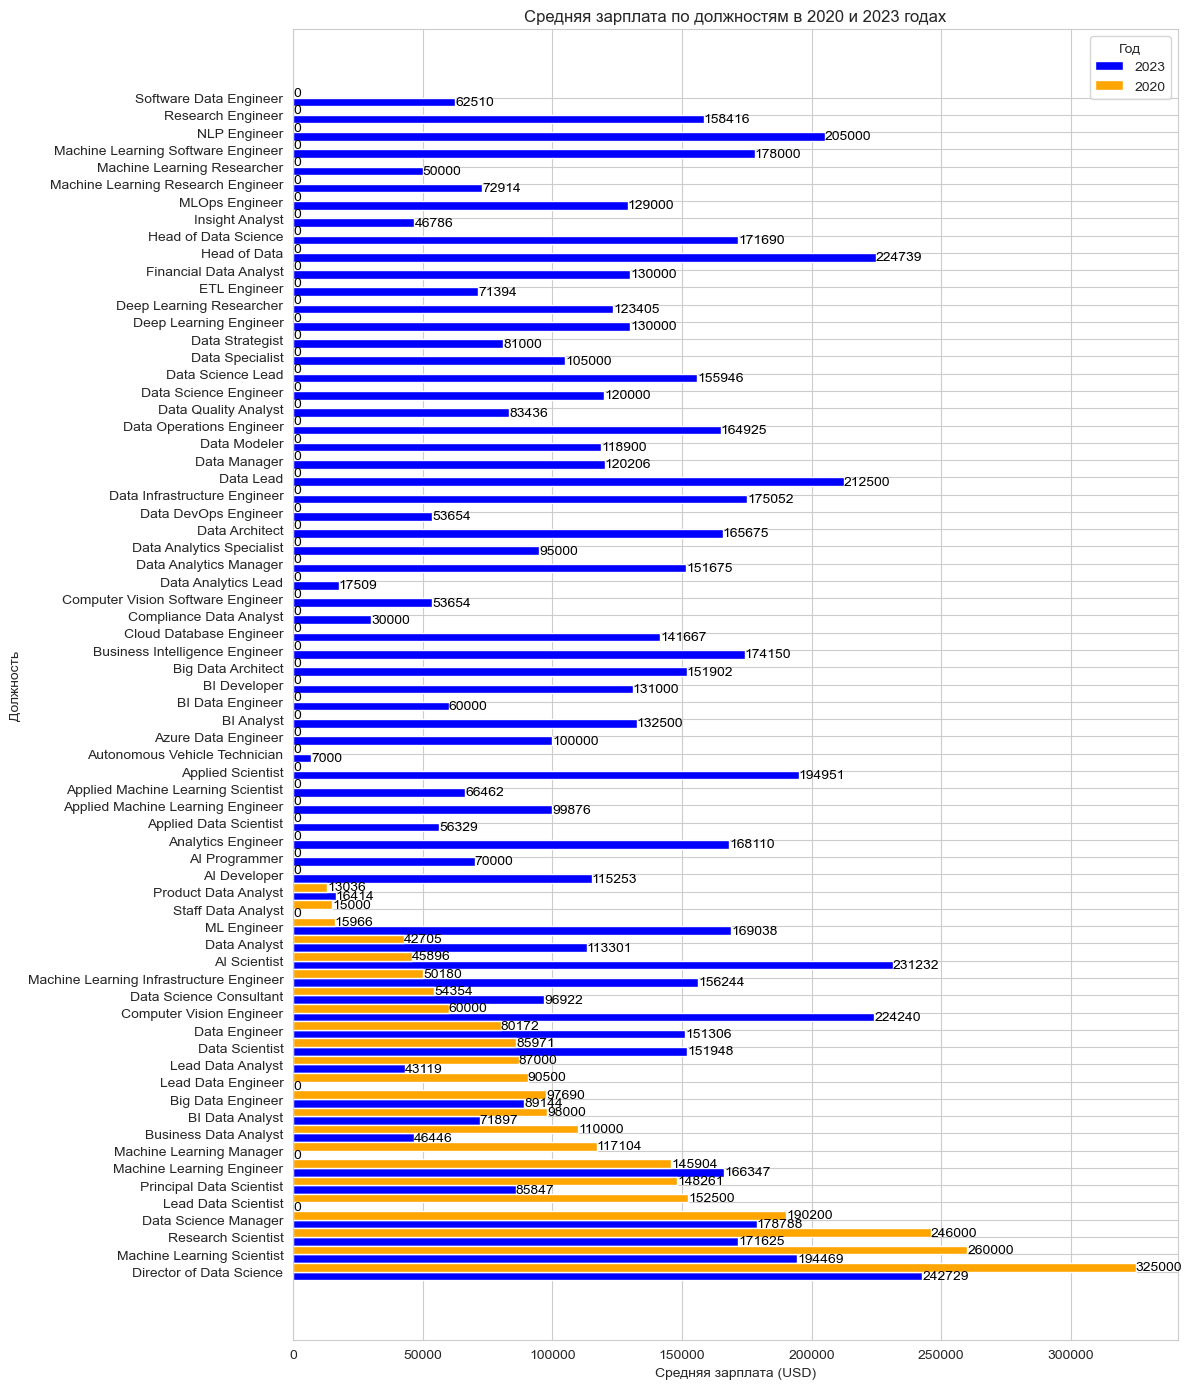

In [257]:
# Фильтруем данные только для 2020 и 2023 годов
filtered_df = df_unique[df_unique['work_year'].isin([2020, 2023])]

# Группируем данные по должности и году, находим среднюю зарплату
mean_salary = filtered_df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()

# Пивотируем данные для удобного отображения
pivot_salary = mean_salary.pivot(index='job_title', columns='work_year', values='salary_in_usd').reset_index()

# Сортируем по средней зарплате 2020 года
pivot_salary = pivot_salary.sort_values(by=2020, ascending=False)

# Заменяем NaN на 0 (или удаляем строки с NaN)
pivot_salary.fillna(0, inplace=True)  # или использовать pivot_salary.dropna(inplace=True)

# Визуализация
plt.figure(figsize=(12, 14))

# Создаем индексы для каждой должности
indices = range(len(pivot_salary))

# Высота столбцов для визуализации
bar_width = 0.5

# Столбцы для 2023 года
plt.barh(indices, pivot_salary[2023], label='2023', color='blue', height=bar_width)

# Столбцы для 2020 года, сдвинутые на высоту столбца
plt.barh([i + bar_width for i in indices], pivot_salary[2020], label='2020', color='orange', height=bar_width)

# Настройка графика
plt.title('Средняя зарплата по должностям в 2020 и 2023 годах')
plt.xlabel('Средняя зарплата (USD)')
plt.ylabel('Должность')
plt.yticks([i + bar_width / 2 for i in indices], pivot_salary['job_title'])
plt.legend(title='Год')

# Добавляем подписи к столбцам
for index, (value_2023, value_2020) in enumerate(zip(pivot_salary[2023], pivot_salary[2020])):
    if pd.notna(value_2023) and pd.notna(value_2020):  # Проверка на конечные значения
        plt.text(value_2023, index, f'{value_2023:.0f}', va='center', ha='left', color='black', fontsize=10)
        plt.text(value_2020, index + bar_width, f'{value_2020:.0f}', va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()  # Для улучшенного оформления
plt.show()
         

### g. Портрет самого успешного и богатого работника

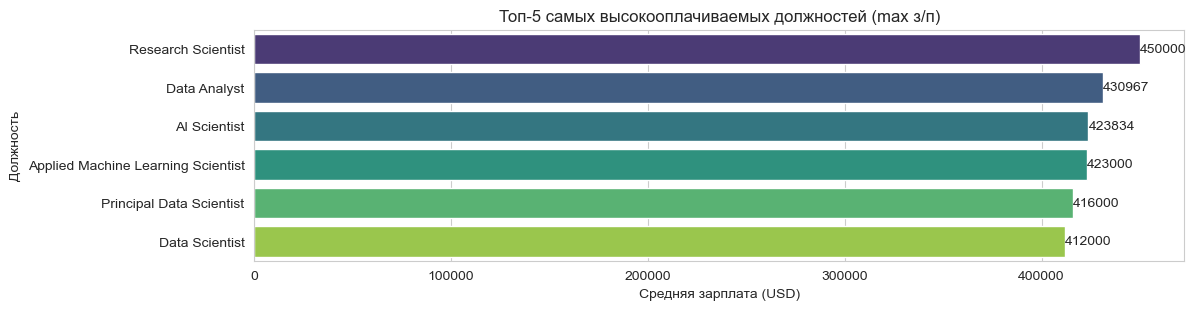

In [259]:
# Группируем данные по должности и находим среднюю зарплату
top_jobs = df_unique.groupby('job_title')['salary_in_usd'].max().reset_index()

# Сортируем по убыванию зарплаты
top_jobs = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Выбираем топ-5 должностей
top_5_jobs = top_jobs.head(6)

# Визуализация
plt.figure(figsize=(12, 3))
sns.barplot(x='salary_in_usd', y='job_title', data=top_5_jobs, palette='viridis')
plt.title('Топ-5 самых высокооплачиваемых должностей (max з/п)')
plt.xlabel('Средняя зарплата (USD)')
plt.ylabel('Должность')

# Добавляем подписи к столбцам
for index, value in enumerate(top_5_jobs['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

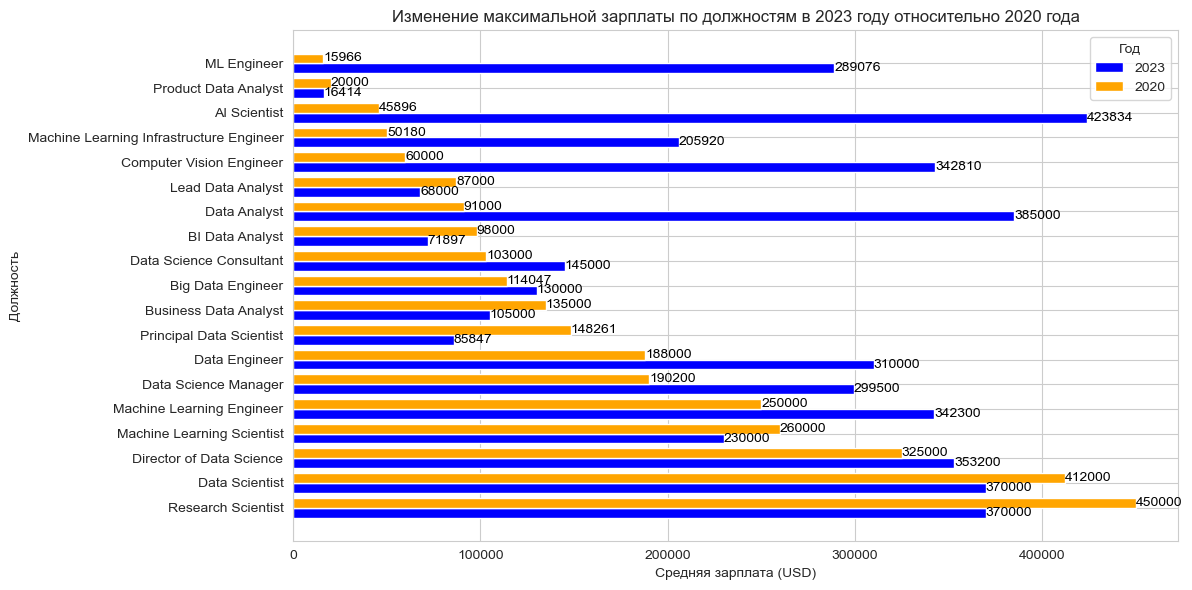

In [260]:
# Фильтруем данные только для 2020 и 2023 годов
filtered_df = df_unique[df_unique['work_year'].isin([2020, 2023])]

# Группируем данные по должности и году, находим среднюю зарплату
mean_salary = filtered_df.groupby(['job_title', 'work_year'])['salary_in_usd'].max().reset_index()

# Пивотируем данные для удобного отображения
pivot_salary = mean_salary.pivot(index='job_title', columns='work_year', values='salary_in_usd').reset_index()

# Отбираем только те должности, которые есть в обоих годах
pivot_salary = pivot_salary.dropna()

# Сортируем по средней зарплате 2020 года
pivot_salary = pivot_salary.sort_values(by=2020, ascending=False)

# Визуализация
plt.figure(figsize=(12, 6))

# Создаем индексы для каждой должности
indices = range(len(pivot_salary))

# Высота столбцов для визуализации
bar_width = 0.4

# Столбцы для 2023 года
plt.barh(indices, pivot_salary[2023], label='2023', color='blue', height=bar_width)

# Столбцы для 2020 года, сдвинутые на высоту столбца
plt.barh([i + bar_width for i in indices], pivot_salary[2020], label='2020', color='orange', height=bar_width)

# Настройка графика
plt.title('Изменение максимальной зарплаты по должностям в 2023 году относительно 2020 года')
plt.xlabel('Средняя зарплата (USD)')
plt.ylabel('Должность')
plt.yticks([i + bar_width / 2 for i in indices], pivot_salary['job_title'])
plt.legend(title='Год')

# Добавляем подписи к столбцам
for index, (value_2023, value_2020) in enumerate(zip(pivot_salary[2023], pivot_salary[2020])):
    plt.text(value_2023, index, f'{value_2023:.0f}', va='center', ha='left', color='black', fontsize=10)
    plt.text(value_2020, index + bar_width, f'{value_2020:.0f}', va='center', ha='left', color='black', fontsize=10)

plt.tight_layout()  # Для улучшенного оформления
plt.show()

In [261]:
# Группируем данные по формату работы и находим максимальную зарплату
top_remote_ratio = df_unique.groupby('remote_ratio')['salary_in_usd'].max().reset_index()

# Округляем среднюю зарплату до целого числа
top_remote_ratio['salary_in_usd'] = top_remote_ratio['salary_in_usd'].round()

# Сортируем по убыванию зарплаты
top_remote_ratio = top_remote_ratio.sort_values(by='salary_in_usd', ascending=False)
print(f'Формат работы (удаленка/офис) и зарплата в долларах США:\nind {top_remote_ratio}')

Формат работы (удаленка/офис) и зарплата в долларах США:
ind    remote_ratio  salary_in_usd
0             0         450000
1            50         423000
2           100         416000


In [262]:
# Группируем данные по стране пребывавния сотрудника и находим максимальную зарплату
top_employee_residence = df_unique.groupby('employee_residence')['salary_in_usd'].max().reset_index()

# Округляем среднюю зарплату до целого числа
top_employee_residence['salary_in_usd'] = top_employee_residence['salary_in_usd'].round()

# Сортируем по убыванию зарплаты
top_employee_residence = top_employee_residence.sort_values(by='salary_in_usd', ascending=False)
print(f'Страна пребывавния сотрудника и зарплата в долларах США:\nind {top_employee_residence}')

Страна пребывавния сотрудника и зарплата в долларах США:
ind    employee_residence  salary_in_usd
75                 US         450000
29                 GB         430967
38                 IL         423834
39                 IN         300000
11                 CA         275000
..                ...            ...
51                 MD          18000
36                 ID          15000
70                 SK          12608
50                 MA          10000
52                 MK           6304

[78 rows x 2 columns]


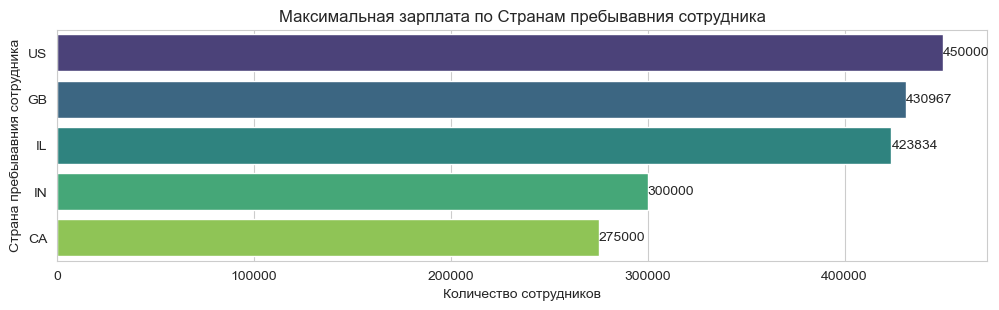

In [263]:
# Группируем данные по стране пребывавния сотрудника и находим максимальную зарплату
top_jobs = df_unique.groupby('employee_residence')['salary_in_usd'].max().reset_index()

# Сортируем по убыванию сотрудников
top_jobs = top_jobs.sort_values(by='salary_in_usd', ascending=False)

# Выбираем топ-5 должностей
top_5_jobs = top_jobs.head(5)

# Визуализация
plt.figure(figsize=(12, 3))
sns.barplot(x='salary_in_usd', y='employee_residence', data=top_5_jobs, palette='viridis')
plt.title('Максимальная зарплата по Странам пребывавния сотрудника')
plt.xlabel('Количество сотрудников')
plt.ylabel('Страна пребывавния сотрудника')

# Добавляем подписи к столбцам
for index, value in enumerate(top_5_jobs['salary_in_usd']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

In [264]:
def print_max_salary(df, exclude_columns=None, line_width=140):
    if exclude_columns is None:
        exclude_columns = []

    # Группируем по work_year и находим индексы строк с максимальным значением salary_in_usd
    max_salary_indices = df.groupby('work_year')['salary_in_usd'].idxmax()

    # Извлекаем строки с максимальными зарплатами
    max_salary_rows = df.loc[max_salary_indices]

    # Удаляем указанные столбцы
    max_salary_rows = max_salary_rows.drop(columns=exclude_columns, errors='ignore')

    # Выводим результат с заданной шириной
    print(max_salary_rows.to_string(index=False, header=True, line_width=line_width))

# Выводим на печать результат
exclude_columns = ['employment_type', 'salary', 'salary_currency']  # Укажите столбцы для исключения
line_width = 160  # Укажите необходимую ширину вывода
print_max_salary(df_unique, exclude_columns, line_width)

 work_year experience_level                          job_title  salary_in_usd employee_residence  remote_ratio company_location company_size
      2020               MI                 Research Scientist         450000                 US             0               US            M
      2021               MI Applied Machine Learning Scientist         423000                 US            50               US            L
      2022               MI                       Data Analyst         430967                 GB             0               GB            M
      2023               SE                       AI Scientist         423834                 IL             0               IL            L


## g. Портрет самого успешного и богатого работника: 
- в 2020 году должность - Research Scientist на FT в офисе в USA (без удаленной работы) - 450 t. usd;
- в 2021 году должность - Applied Machine Learning Scientist на FT с частичной удаленкой (50%) и в офисе в USA (50%) - 423 th.usd;
- в 2022 году должность - Data Analyst на FT в офисе в GB (Англия, без удаленной работы) - 431 th.usd;
- в 2023 году должность - AI Scientist на FT в офисе в IL (Израиль, без удаленной работы) - 424 th.usd;

## h. Распределение работников с гибридной формой работы (и офис и удаленка/удаленка) по регионам проживания и их несовпадение с регионом работы 

In [267]:
# Фильтруем DataFrame по remote_ratio
filtered_df = df_unique[df_unique['remote_ratio'] != 0]

# Подсчитываем количество несовпадений employee_residence и company_location
mismatch_count = (filtered_df['employee_residence'] != filtered_df['company_location']).sum()

# Вычисляем топ-50 совпадений по employee_residence с их процентом несовпадений
top_matches = (filtered_df.groupby('employee_residence')
                  .agg(total_matches=('company_location', 'size'),
                      mismatches=('company_location', lambda x: (x != filtered_df.loc[x.index, 'employee_residence']).sum()))
                  .reset_index())

top_matches['mismatch_percentage'] = (top_matches['mismatches'] / top_matches['total_matches']) * 100

# Округляем процент несовпадений до двух знаков после запятой
top_matches['mismatch_percentage'] = top_matches['mismatch_percentage'].round(2)

# Сортируем по количеству совпадений и выбираем топ-50
top_50_matches = top_matches.sort_values(by='total_matches', ascending=False).head(50)

# Выводим результаты
print(f'Количество людей работающих и проживающих в разных регионах: {mismatch_count} чел.\n')
print("Топ 50 мест жительства работников и процент несовпадения с местоположением компании:\n")
print(top_50_matches[['employee_residence', 'total_matches', 'mismatches', 'mismatch_percentage']].to_string(index=False))

Количество людей работающих и проживающих в разных регионах: 89 чел.

Топ 50 мест жительства работников и процент несовпадения с местоположением компании:

employee_residence  total_matches  mismatches  mismatch_percentage
                US            922           5                 0.54
                GB             67           1                 1.49
                IN             60          13                21.67
                CA             55           2                 3.64
                FR             35           6                17.14
                DE             31           2                 6.45
                ES             29           5                17.24
                BR             16           3                18.75
                GR             12           2                16.67
                NL             11           2                18.18
                PT             11           4                36.36
                AU             10       

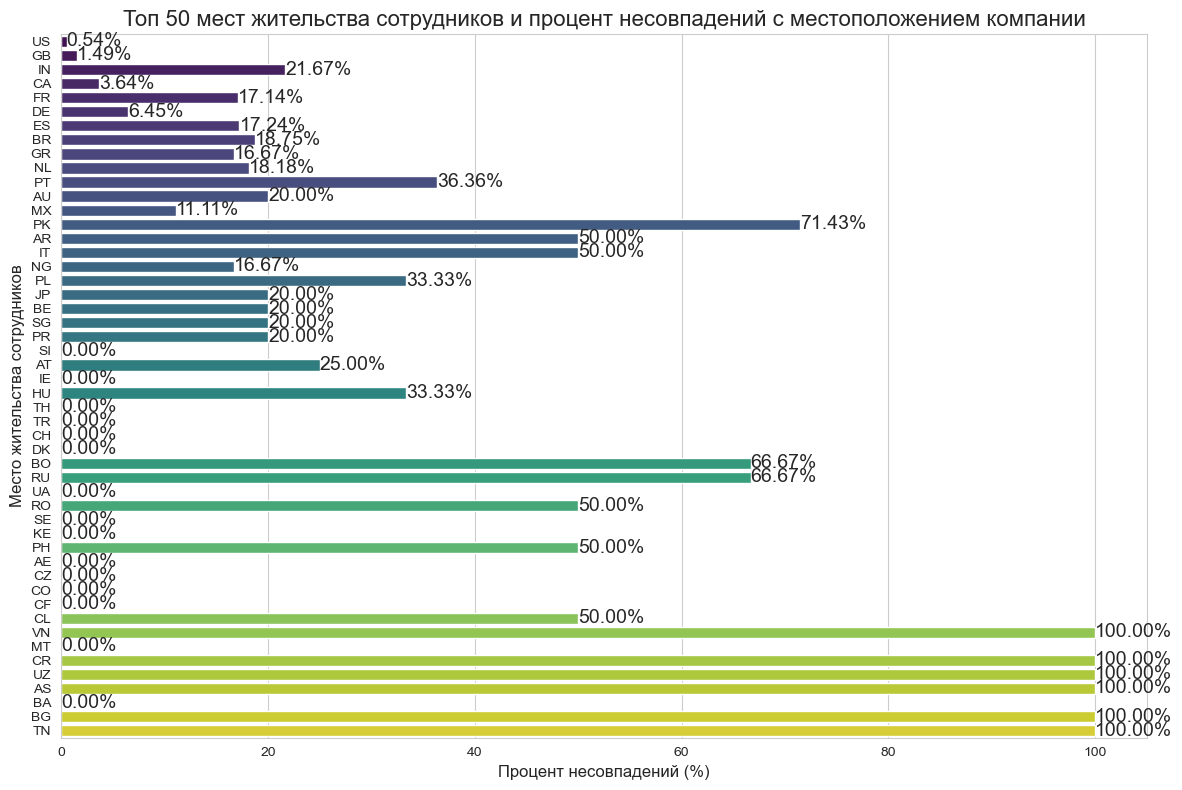

In [268]:
# Настраиваем размеры графика
plt.figure(figsize=(12, 8))

# Создаем столбчатую диаграмму для отображения данных
bar_plot = sns.barplot(data=top_50_matches, 
                       x='mismatch_percentage', 
                       y='employee_residence', 
                       palette='viridis')

# Добавляем заголовок и подписи к осям
plt.title('Топ 50 мест жительства сотрудников и процент несовпадений с местоположением компании', fontsize=16)
plt.xlabel('Процент несовпадений (%)', fontsize=12)
plt.ylabel('Место жительства сотрудников', fontsize=12)

# Добавляем значения процентного соотношения на столбцы
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.2f}%', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center', fontsize=14)

# Отображаем график
plt.tight_layout()
plt.show()

### Выводы: только для работников с гибридной формой работы (и офис и удаленка/удаленка).
- Наибольшее количество людей проживает и работает в США - 922 чел., дополнительно 5 человек проживает в США, но работает удаленно на другую страну (0,5%). США лидируют по месту жительства сотрудников с большим отрывом от остальных Топ-5.
- На втором месте находится Великобритания с 67 чел. локальных сотрудников и 1 работающим на другую страну (1,5%).
- На третьем месте Индия с 60 сотрудниками проживающими и работающими в стране и 13 работающими на другую страну (21,7%).

## h. Распределение всех работников по регионам проживания

In [271]:
# Подсчитываем количество несовпадений employee_residence и company_location
mismatch_count = (df_unique['employee_residence'] != df_unique['company_location']).sum()

# Вычисляем топ-50 совпадений по employee_residence с их процентом несовпадений
top_matches = (df_unique.groupby('employee_residence')
                  .agg(total_matches=('company_location', 'size'),
                      mismatches=('company_location', lambda x: (x != df_unique.loc[x.index, 'employee_residence']).sum()))
                  .reset_index())

top_matches['mismatch_percentage'] = (top_matches['mismatches'] / top_matches['total_matches']) * 100

# Округляем процент несовпадений до двух знаков после запятой
top_matches['mismatch_percentage'] = top_matches['mismatch_percentage'].round(2)

# Сортируем по количеству совпадений и выбираем топ-50
top_50_matches = top_matches.sort_values(by='total_matches', ascending=False).head(50)

# Выводим результаты
print(f'Количество людей работающих и проживающих в разных регионах: {mismatch_count} чел.\n')
print("Топ 50 мест жительства работников и процент несовпадения с местоположением компании:\n")
print(top_50_matches[['employee_residence', 'total_matches', 'mismatches', 'mismatch_percentage']].to_string(index=False))

Количество людей работающих и проживающих в разных регионах: 96 чел.

Топ 50 мест жительства работников и процент несовпадения с местоположением компании:

employee_residence  total_matches  mismatches  mismatch_percentage
                US           1893           5                 0.26
                GB            150           1                 0.67
                CA             81           2                 2.47
                IN             70          15                21.43
                ES             47           5                10.64
                DE             47           2                 4.26
                FR             37           6                16.22
                PT             18           4                22.22
                BR             18           3                16.67
                NL             15           2                13.33
                GR             13           2                15.38
                AU             11       

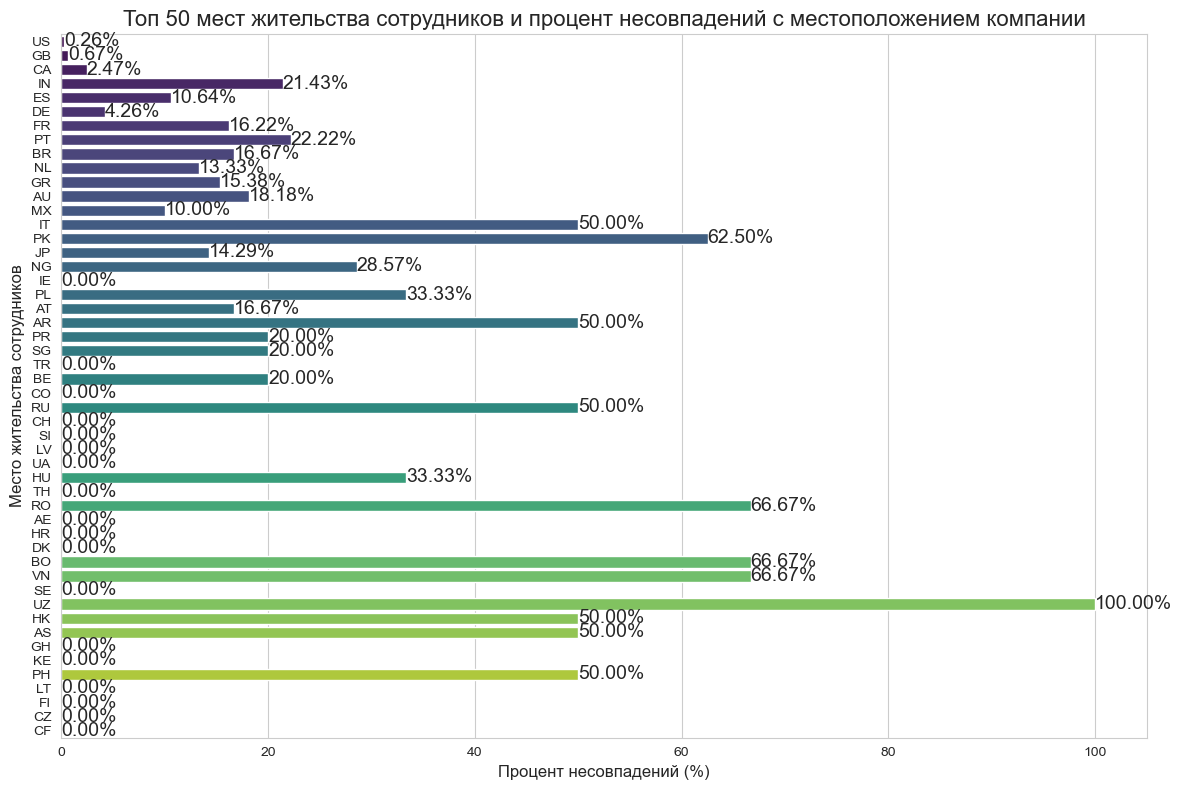

In [272]:
# Настраиваем размеры графика
plt.figure(figsize=(12, 8))

# Создаем столбчатую диаграмму для отображения данных
bar_plot = sns.barplot(data=top_50_matches, 
                       x='mismatch_percentage', 
                       y='employee_residence', 
                       palette='viridis')

# Добавляем заголовок и подписи к осям
plt.title('Топ 50 мест жительства сотрудников и процент несовпадений с местоположением компании', fontsize=16)
plt.xlabel('Процент несовпадений (%)', fontsize=12)
plt.ylabel('Место жительства сотрудников', fontsize=12)

# Добавляем значения процентного соотношения на столбцы
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.2f}%', 
                      (p.get_width(), p.get_y() + p.get_height() / 2), 
                      ha='left', va='center', fontsize=14)

# Отображаем график
plt.tight_layout()
plt.show()

### Выводы для всех работников с любой формой работы (офис/и офис и удаленка/удаленка).
- Наибольшее количество людей проживает и работает в США - 1 893 чел., дополнительно 5 человек проживает в США, но работает удаленно на другую страну (0,3%). США лидирует по месту жительства сотрудников с большим отрывом от остальных Топ-5.
- На втором месте находится Великобритания с 150 чел. локальных сотрудников и 1 работающим на другую страну (0,7%).
- На третьем месте Канада с 81 сотрудником проживающим и работающим в стране и 2 работающими на другую страну (2,5%).
- Индия расположилась на четвертом месте с 70 сотрудниками проживающими и работающими в стране и 15 работающими на другую страну (21,4%).

## 

### Приложение

(дополнительные расчеты и визуализация)

### Распределение работников с гибридной формой работы (и офис и удаленка/удаленка) по регионам проживания и их несовпадение с регионом работы 

In [278]:
# Фильтруем DataFrame по remote_ratio
filtered_df = df_unique[df_unique['remote_ratio'] != 0]

# Подсчитываем количество несовпадений employee_residence и company_location
mismatch_count = (filtered_df['employee_residence'] != filtered_df['company_location']).sum()

# Вычисляем топ-50 совпадений по employee_residence с их процентом несовпадений, разбивая по work_year
top_matches = (filtered_df.groupby(['work_year', 'employee_residence'])
                  .agg(total_matches=('company_location', 'size'),
                      mismatches=('company_location', lambda x: (x != filtered_df.loc[x.index, 'employee_residence']).sum()))
                  .reset_index())

top_matches['mismatch_percentage'] = (top_matches['mismatches'] / top_matches['total_matches']) * 100

# Округляем процент несовпадений до двух знаков после запятой
top_matches['mismatch_percentage'] = top_matches['mismatch_percentage'].round(2)

# Сортируем по количеству совпадений и выбираем топ-50
top_50_matches = top_matches.sort_values(by='total_matches', ascending=False).head(50)

# Выводим результаты
print(f'Количество людей работающих и проживающих в разных регионах: {mismatch_count} чел.\n')
print("Топ 50 по employee_residence и % несовпадений с company_location:\n")
print(top_50_matches[['work_year', 'employee_residence', 'total_matches', 'mismatches', 'mismatch_percentage']].to_string(index=False))

Количество людей работающих и проживающих в разных регионах: 89 чел.

Топ 50 по employee_residence и % несовпадений с company_location:

 work_year employee_residence  total_matches  mismatches  mismatch_percentage
      2022                 US            479           3                 0.63
      2023                 US            348           0                 0.00
      2021                 US             72           2                 2.78
      2022                 GB             31           0                 0.00
      2022                 CA             27           2                 7.41
      2022                 IN             24           6                25.00
      2020                 US             23           0                 0.00
      2023                 GB             21           0                 0.00
      2021                 IN             20           4                20.00
      2023                 CA             18           0                 0.00
     

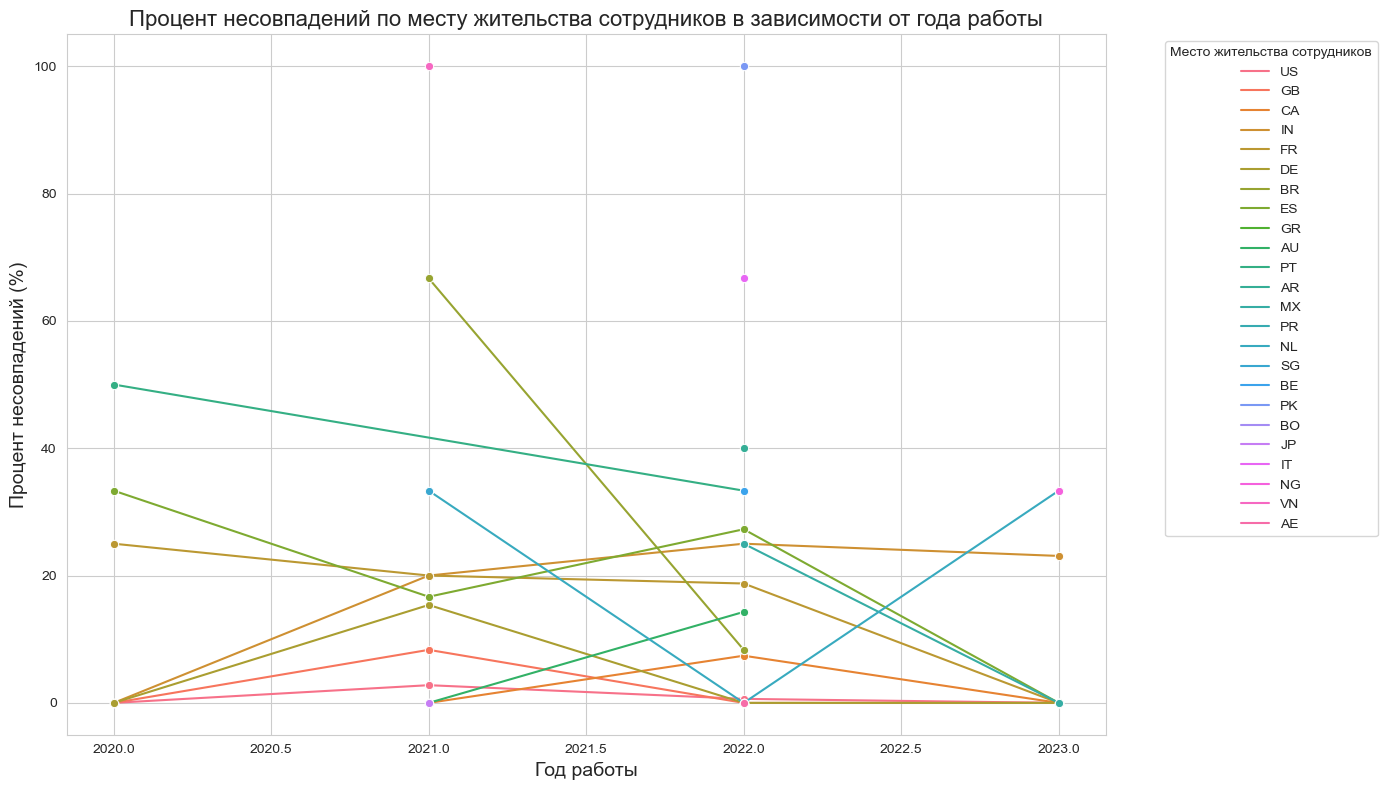

In [279]:
# Настраиваем размеры графика
plt.figure(figsize=(14, 8))

# Создаем линейный график для отображения процентов несовпадений по каждому году
line_plot = sns.lineplot(data=top_50_matches, 
                         x='work_year', 
                         y='mismatch_percentage', 
                         hue='employee_residence', 
                         marker='o')

# Добавляем заголовок и подписи к осям
plt.title('Процент несовпадений по месту жительства сотрудников в зависимости от года работы', fontsize=16)
plt.xlabel('Год работы', fontsize=14)
plt.ylabel('Процент несовпадений (%)', fontsize=14)

# Настраиваем легенду
plt.legend(title='Место жительства сотрудников', bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображаем график
plt.tight_layout()
plt.show()

#### Визуализация распределения зарплат по должностям в 2020 и 2023 годах

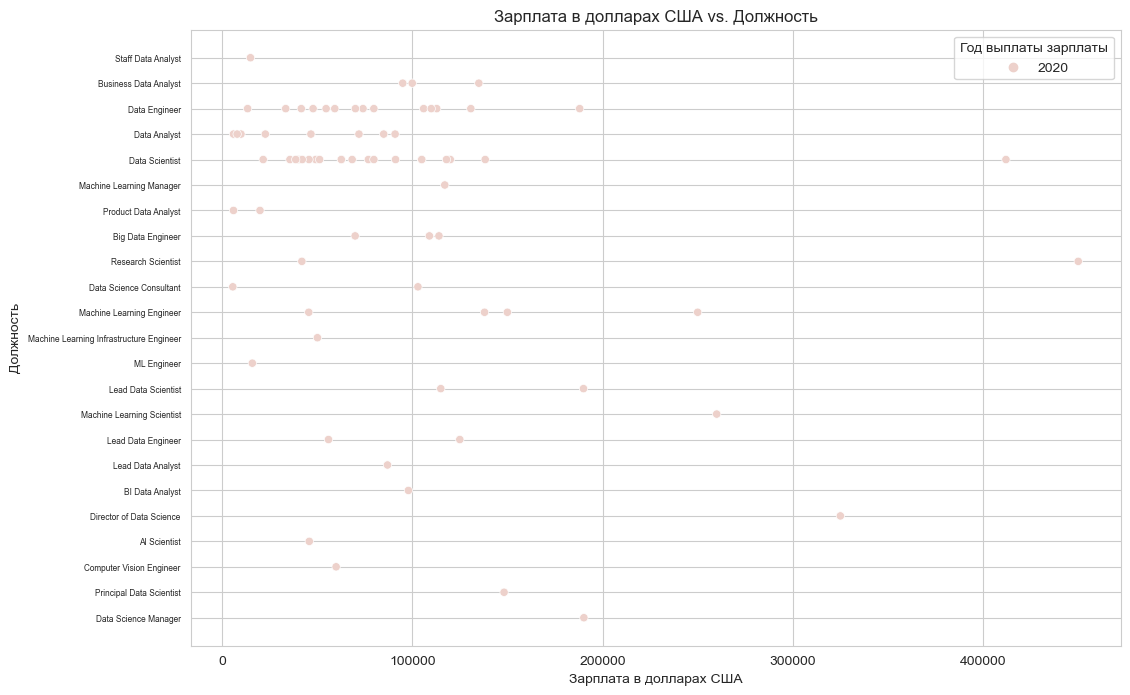

In [281]:
# Оценим 2020 год на предмет связи Должности, на которой работал сотрудник в течение года и размер зарплаты в долларах США
df_2020 = df_unique[df_unique.work_year == 2020]

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=df_2020, x='salary_in_usd', y='job_title', hue='work_year')  
ax.set_xlabel('Зарплата в долларах США')  
ax.set_ylabel('Должность', fontsize=10)  # можем изменить размер шрифта оси Y
ax.set_title('Зарплата в долларах США vs. Должность')
plt.xticks(rotation=0)  # можем поменять расположение подписей по оси Х
plt.yticks(fontsize=6)  # можем поменять размер шрифта для должностей по оси Y
plt.legend(title='Год выплаты зарплаты')  
plt.show()

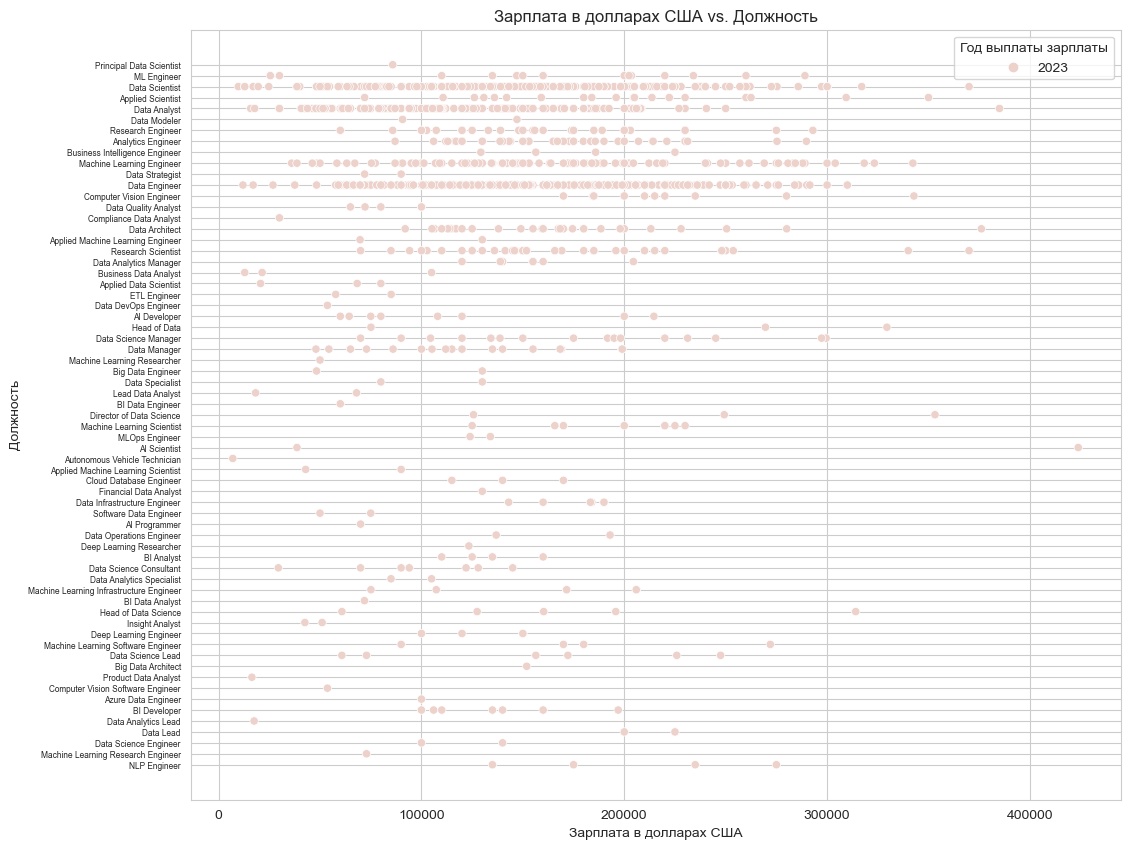

In [282]:
# Оценим 2023 год на предмет связи Должности, на которой работал сотрудник в течение года и размер зарплаты в долларах США
df_2023 = df_unique[df_unique.work_year == 2023]

plt.figure(figsize=(12, 10))
ax = sns.scatterplot(data=df_2023, x='salary_in_usd', y='job_title', hue='work_year')  
ax.set_xlabel('Зарплата в долларах США')  
ax.set_ylabel('Должность', fontsize=10)  # можем изменить размер шрифта оси Y
ax.set_title('Зарплата в долларах США vs. Должность')
plt.xticks(rotation=0)  # можем поменять расположение подписей по оси Х
plt.yticks(fontsize=6)  # можем поменять размер шрифта для должностей по оси Y
plt.legend(title='Год выплаты зарплаты')  
plt.show()